In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:.5f}'.format

In [4]:
traind = pd.read_csv('train.csv')

In [5]:
traind

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.50000,10년 이상,0.00000,9,13.40000,400597.50000,0,24,1,부채 통합,단기 상환,390903.00000,225457.50000,8806.50000,767,0
1,TRAIN_00001,월세,1979505.00000,10년 이상,0.00000,5,15.10000,360679.50000,0,11,0,부채 통합,단기 상환,1002184.50000,64749.00000,24961.50000,767,0
2,TRAIN_00002,월세,1356381.00000,4년,0.00000,12,18.80000,491770.50000,1,74,3,부채 통합,단기 상환,227775.00000,487644.00000,12069.00000,800,1
3,TRAIN_00003,월세,1049017.50000,6년,0.00000,15,14.80000,411546.00000,1,22,1,부채 통합,단기 상환,251383.50000,413211.00000,31749.00000,796,1
4,TRAIN_00004,월세,4320217.50000,2년,0.00000,11,26.10000,895288.50000,0,32,0,부채 통합,장기 상환,1163176.50000,78991.50000,5862.00000,751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TRAIN_09995,주택 담보 대출 (거주 중),1339473.00000,10년 이상,0.00000,9,18.70000,319027.50000,0,68,0,부채 통합,단기 상환,126216.00000,177028.50000,6237.00000,755,0
9996,TRAIN_09996,주택 담보 대출 (거주 중),2297230.50000,2년,0.00000,11,28.30000,399799.50000,0,7,0,주택 개보수,장기 상환,371907.00000,347449.50000,53301.00000,707,0
9997,TRAIN_09997,주택 담보 대출 (거주 중),1221523.50000,10년 이상,0.00000,9,30.10000,823305.00000,0,14,0,부채 통합,장기 상환,869736.00000,176905.50000,11436.00000,733,0
9998,TRAIN_09998,자가,3343584.00000,10년 이상,0.00000,10,20.30000,724314.00000,0,25,0,부채 통합,단기 상환,443008.50000,139294.50000,25567.50000,696,0


데이터를 확인했을 때 주거형태, 근속연수, 대출목적, 상환기관은 바꿀 필요가 있어 보인다.

In [6]:
traind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

info를 확인했을 때 na가 없어 보인다. 또한 데이터타입이 object인 것들도 확인. UID의 경우 따로 변경할 필요가 없음.

In [7]:
traind.isna().sum()

UID                  0
주거 형태                0
연간 소득                0
현재 직장 근속 연수          0
체납 세금 압류 횟수          0
개설된 신용계좌 수           0
신용 거래 연수             0
최대 신용한도              0
신용 문제 발생 횟수          0
마지막 연체 이후 경과 개월 수    0
개인 파산 횟수             0
대출 목적                0
대출 상환 기간             0
현재 대출 잔액             0
현재 미상환 신용액           0
월 상환 부채액             0
신용 점수                0
채무 불이행 여부            0
dtype: int64

In [8]:
traind['주거 형태'].unique()

array(['자가', '월세', '주택 담보 대출 (거주 중)', '주택 담보 대출 (비거주 중)'], dtype=object)

In [9]:
traind['현재 직장 근속 연수'].unique()

array(['10년 이상', '4년', '6년', '2년', '8년', '3년', '5년', '9년', '7년', '1년 미만',
       '1년'], dtype=object)

In [10]:
traind['대출 목적'].unique()

array(['부채 통합', '자동차 구매', '기타', '사업 대출', '주택 개보수', '여행 자금', '소규모 사업 자금',
       '교육비', '의료비', '고액 구매', '결혼 자금', '휴가 비용', '주택 구매', '이사 비용'],
      dtype=object)

In [11]:
traind['대출 상환 기간'].unique()

array(['단기 상환', '장기 상환'], dtype=object)

데이터타입이 object인 변수들이 어떤 값이 있는지 확인해봤다.\
대출 목적, 주거 형태인 경우 라벨인코딩 했을 경우 모델링 할 때 문제가 생길거같다.

In [12]:
traind.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

In [13]:
traind_c = traind.copy()

In [14]:
train_num = traind_c[['연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부']]

In [15]:
train_num

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,1941337.50000,0.00000,9,13.40000,400597.50000,0,24,1,390903.00000,225457.50000,8806.50000,767,0
1,1979505.00000,0.00000,5,15.10000,360679.50000,0,11,0,1002184.50000,64749.00000,24961.50000,767,0
2,1356381.00000,0.00000,12,18.80000,491770.50000,1,74,3,227775.00000,487644.00000,12069.00000,800,1
3,1049017.50000,0.00000,15,14.80000,411546.00000,1,22,1,251383.50000,413211.00000,31749.00000,796,1
4,4320217.50000,0.00000,11,26.10000,895288.50000,0,32,0,1163176.50000,78991.50000,5862.00000,751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1339473.00000,0.00000,9,18.70000,319027.50000,0,68,0,126216.00000,177028.50000,6237.00000,755,0
9996,2297230.50000,0.00000,11,28.30000,399799.50000,0,7,0,371907.00000,347449.50000,53301.00000,707,0
9997,1221523.50000,0.00000,9,30.10000,823305.00000,0,14,0,869736.00000,176905.50000,11436.00000,733,0
9998,3343584.00000,0.00000,10,20.30000,724314.00000,0,25,0,443008.50000,139294.50000,25567.50000,696,0


In [16]:
train_num.columns

Index(['연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액',
       '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '채무 불이행 여부'],
      dtype='object')

c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

Text(0.5, 1.0, 'credit point')

C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\j

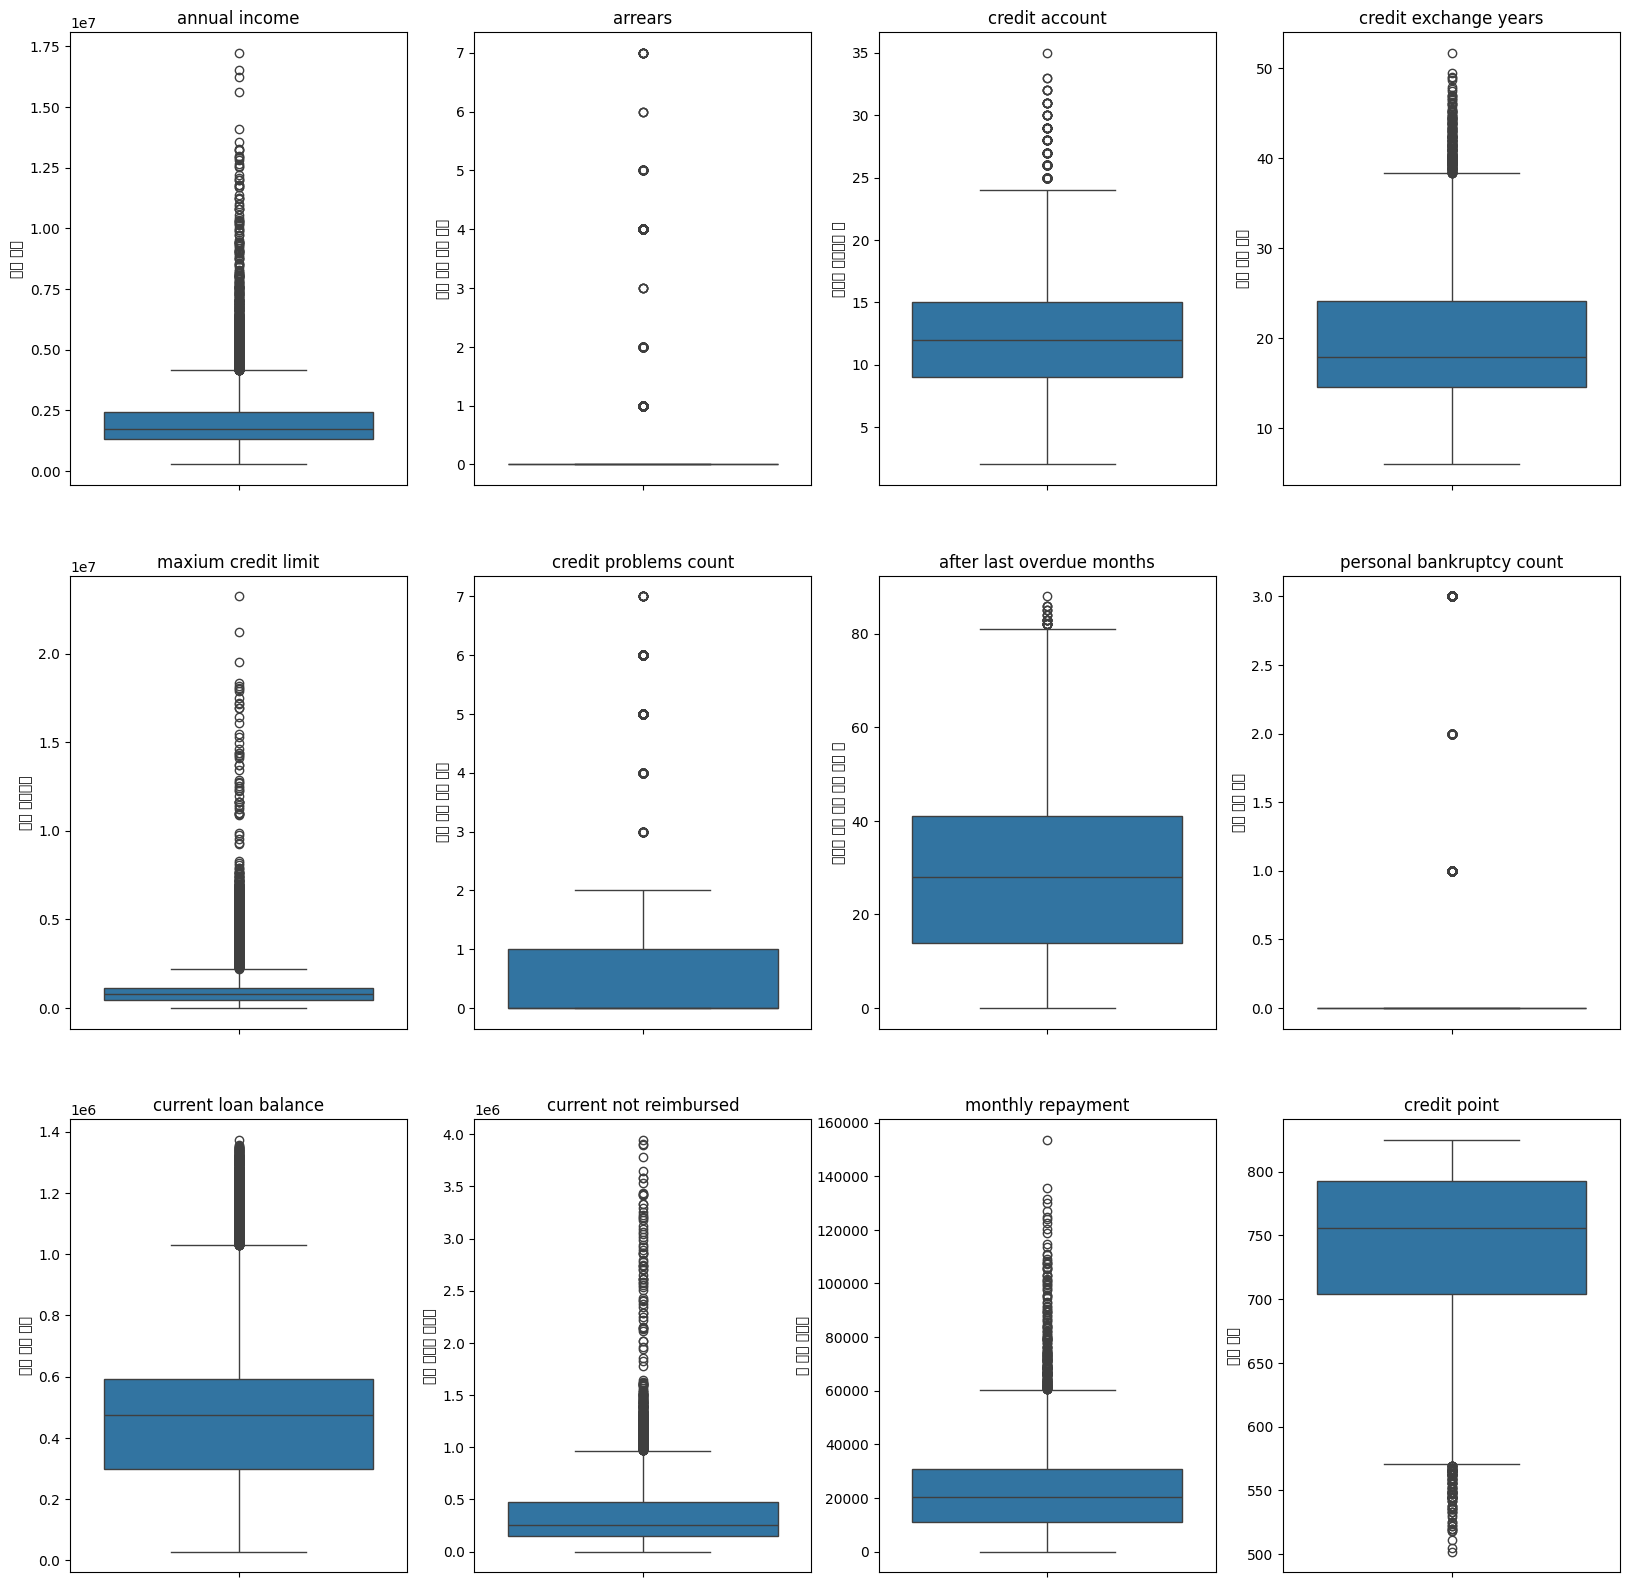

In [17]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
sns.boxplot(train_num['연간 소득'], ax = axes[0, 0])
axes[0, 0].set_title('annual income')
sns.boxplot(train_num['체납 세금 압류 횟수'], ax = axes[0, 1])
axes[0, 1].set_title('arrears')
sns.boxplot(train_num['개설된 신용계좌 수'], ax = axes[0, 2])
axes[0, 2].set_title('credit account')
sns.boxplot(train_num['신용 거래 연수'], ax = axes[0, 3])
axes[0, 3].set_title('credit exchange years')
sns.boxplot(train_num['최대 신용한도'], ax = axes[1, 0])
axes[1, 0].set_title('maxium credit limit')
sns.boxplot(train_num['신용 문제 발생 횟수'], ax = axes[1, 1])
axes[1, 1].set_title('credit problems count')
sns.boxplot(train_num['마지막 연체 이후 경과 개월 수'], ax = axes[1, 2])
axes[1, 2].set_title('after last overdue months')
sns.boxplot(train_num['개인 파산 횟수'], ax = axes[1, 3])
axes[1, 3].set_title('personal bankruptcy count')
sns.boxplot(train_num['현재 대출 잔액'], ax = axes[2, 0])
axes[2, 0].set_title('current loan balance')
sns.boxplot(train_num['현재 미상환 신용액'], ax = axes[2, 1])
axes[2, 1].set_title('current not reimbursed')
sns.boxplot(train_num['월 상환 부채액'], ax = axes[2, 2])
axes[2, 2].set_title('monthly repayment')
sns.boxplot(train_num['신용 점수'], ax = axes[2, 3])
axes[2, 3].set_title('credit point')

In [18]:
traind['채무 불이행 여부'].unique()

array([0, 1], dtype=int64)

boxplot을 그려봤을 때, 이상치가 굉장히 많이 보인다.\
이러한 값들을 제거해야 모델링 성능이 좋아지므로 제거를 해야한다.\
채무 불이행 여부는 이진분류라 상관계수를 보는건 큰 의미가 없을거같다.

IQR을 활용해서 이상치를 제거

In [19]:
train_num.columns

Index(['연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액',
       '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '채무 불이행 여부'],
      dtype='object')

In [20]:
train_numc = train_num.copy()

In [21]:
train_num_iqr = train_numc[['연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액',
       '현재 미상환 신용액', '월 상환 부채액', '신용 점수']]

In [22]:
train_num_iqr

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
0,1941337.50000,0.00000,9,13.40000,400597.50000,0,24,1,390903.00000,225457.50000,8806.50000,767
1,1979505.00000,0.00000,5,15.10000,360679.50000,0,11,0,1002184.50000,64749.00000,24961.50000,767
2,1356381.00000,0.00000,12,18.80000,491770.50000,1,74,3,227775.00000,487644.00000,12069.00000,800
3,1049017.50000,0.00000,15,14.80000,411546.00000,1,22,1,251383.50000,413211.00000,31749.00000,796
4,4320217.50000,0.00000,11,26.10000,895288.50000,0,32,0,1163176.50000,78991.50000,5862.00000,751
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1339473.00000,0.00000,9,18.70000,319027.50000,0,68,0,126216.00000,177028.50000,6237.00000,755
9996,2297230.50000,0.00000,11,28.30000,399799.50000,0,7,0,371907.00000,347449.50000,53301.00000,707
9997,1221523.50000,0.00000,9,30.10000,823305.00000,0,14,0,869736.00000,176905.50000,11436.00000,733
9998,3343584.00000,0.00000,10,20.30000,724314.00000,0,25,0,443008.50000,139294.50000,25567.50000,696


In [23]:
train_num_iqr.describe()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,2163958.88415,0.19930,12.24890,19.87936,1175264.73780,0.62620,30.88920,0.37320,506120.00040,364912.61760,22367.28075,744.21500
std,1434429.68196,0.71430,4.62057,7.20669,1604199.21520,1.23419,20.01156,0.84380,283146.23273,353794.16067,15186.49738,56.99570
min,267621.00000,0.00000,2.00000,6.00000,0.00000,0.00000,0.00000,0.00000,29176.50000,0.00000,0.00000,502.00000
25%,1311437.25000,0.00000,9.00000,14.60000,448247.62500,0.00000,14.00000,0.00000,300190.12500,147185.62500,10893.75000,704.00000
50%,1743222.75000,0.00000,12.00000,17.95000,767091.00000,0.00000,28.00000,0.00000,474341.25000,254793.00000,20160.00000,756.00000
75%,2447664.00000,0.00000,15.00000,24.10000,1147282.87500,1.00000,41.00000,0.00000,591907.87500,474918.00000,30647.25000,793.00000
max,17229747.00000,7.00000,35.00000,51.70000,23232333.00000,7.00000,88.00000,3.00000,1373613.00000,3946300.50000,153574.50000,825.00000


In [24]:
cols = train_num_iqr.columns
num_cols = len(cols)
num_cols

12

In [25]:
train_num_iqr.loc[2]

연간 소득               1356381.00000
체납 세금 압류 횟수               0.00000
개설된 신용계좌 수               12.00000
신용 거래 연수                 18.80000
최대 신용한도              491770.50000
신용 문제 발생 횟수               1.00000
마지막 연체 이후 경과 개월 수        74.00000
개인 파산 횟수                  3.00000
현재 대출 잔액             227775.00000
현재 미상환 신용액           487644.00000
월 상환 부채액              12069.00000
신용 점수                   800.00000
Name: 2, dtype: float64

In [26]:
train_num_iqrc = train_num_iqr.copy()

In [27]:
from deloutlier import DelOutlier
train_nooutlier = DelOutlier(train_num_iqrc)
train_nooutlier

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
1,1979505.00000,0.00000,5.00000,15.10000,360679.50000,0.00000,11.00000,0.00000,1002184.50000,64749.00000,24961.50000,767.00000
7,1410700.50000,0.00000,8.00000,24.40000,692352.00000,0.00000,19.00000,0.00000,479349.00000,154974.00000,16842.00000,807.00000
8,1636863.00000,0.00000,9.00000,9.80000,154429.50000,0.00000,11.00000,0.00000,370210.50000,11943.00000,28818.00000,713.00000
9,1644226.50000,0.00000,6.00000,12.70000,511518.00000,0.00000,29.00000,0.00000,187140.00000,122344.50000,5214.00000,793.00000
10,2993922.00000,0.00000,5.00000,19.50000,0.00000,0.00000,70.00000,0.00000,230776.50000,47728.50000,11479.50000,756.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
9992,1327737.00000,0.00000,10.00000,14.20000,100882.50000,0.00000,32.00000,0.00000,480877.50000,141427.50000,8163.00000,649.00000
9995,1339473.00000,0.00000,9.00000,18.70000,319027.50000,0.00000,68.00000,0.00000,126216.00000,177028.50000,6237.00000,755.00000
9996,2297230.50000,0.00000,11.00000,28.30000,399799.50000,0.00000,7.00000,0.00000,371907.00000,347449.50000,53301.00000,707.00000
9997,1221523.50000,0.00000,9.00000,30.10000,823305.00000,0.00000,14.00000,0.00000,869736.00000,176905.50000,11436.00000,733.00000


In [28]:
train_nooutlier.describe()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
count,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000
mean,1616944.14767,0.00000,11.09516,17.70959,671088.27965,0.13178,29.11686,0.00000,413026.70465,279233.99535,18280.11337,740.08663
std,651695.37871,0.00000,3.87587,5.88556,395701.53032,0.38391,19.81185,0.00000,197961.94548,194660.34788,11198.51160,52.72866
min,267621.00000,0.00000,2.00000,6.00000,0.00000,0.00000,0.00000,0.00000,29176.50000,0.00000,0.00000,571.00000
25%,1155517.87500,0.00000,8.00000,13.50000,379206.37500,0.00000,12.00000,0.00000,245526.37500,129556.12500,9574.12500,700.00000
50%,1489731.00000,0.00000,11.00000,16.20000,656967.75000,0.00000,26.00000,0.00000,406031.25000,225035.25000,16335.00000,751.00000
75%,1963369.87500,0.00000,13.00000,20.50000,942931.12500,0.00000,38.00000,0.00000,531477.00000,415960.87500,25688.62500,789.00000
max,4146993.00000,0.00000,24.00000,38.10000,2168599.50000,2.00000,81.00000,0.00000,1024660.50000,961791.00000,59212.50000,818.00000


이상치를 제거한 후 describe로 어떻게 됐는지 살펴봤다.\
신용 문제 발생 횟수, 개인 파산 횟수 같이 이상치 제거를 안해줘도 될 변수들도 같이 제거됐다.\
이 경우를 해결해야 한다.

In [29]:
train_num_c = train_num_iqr.copy()

In [30]:
train_num_c.columns

Index(['연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액',
       '현재 미상환 신용액', '월 상환 부채액', '신용 점수'],
      dtype='object')

In [31]:
train_num_c_drop = train_num_c.drop(columns = ['체납 세금 압류 횟수', '신용 문제 발생 횟수', '개인 파산 횟수'])
train_num_c_drop

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
0,1941337.50000,9,13.40000,400597.50000,24,390903.00000,225457.50000,8806.50000,767
1,1979505.00000,5,15.10000,360679.50000,11,1002184.50000,64749.00000,24961.50000,767
2,1356381.00000,12,18.80000,491770.50000,74,227775.00000,487644.00000,12069.00000,800
3,1049017.50000,15,14.80000,411546.00000,22,251383.50000,413211.00000,31749.00000,796
4,4320217.50000,11,26.10000,895288.50000,32,1163176.50000,78991.50000,5862.00000,751
...,...,...,...,...,...,...,...,...,...
9995,1339473.00000,9,18.70000,319027.50000,68,126216.00000,177028.50000,6237.00000,755
9996,2297230.50000,11,28.30000,399799.50000,7,371907.00000,347449.50000,53301.00000,707
9997,1221523.50000,9,30.10000,823305.00000,14,869736.00000,176905.50000,11436.00000,733
9998,3343584.00000,10,20.30000,724314.00000,25,443008.50000,139294.50000,25567.50000,696


In [32]:
from deloutlier import DelOutlier
train_num_drop = DelOutlier(train_num_c_drop)
train_num_drop

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000
6,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000
...,...,...,...,...,...,...,...,...,...
9993,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000
9995,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000
9996,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000
9997,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000


In [33]:
train_no_outlier = pd.merge(train_num_drop, train_num_c)
train_no_outlier

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0


In [34]:
train_no_outlier.describe()

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수
count,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000
mean,1688256.93286,11.53794,18.37816,662908.00007,32.32347,416172.75202,273393.75646,18329.73661,744.53916,0.17882,0.63872,0.41227
std,669132.04418,3.96410,6.07829,392119.97661,20.19541,191230.79409,187049.52633,11427.66731,52.49681,0.66935,1.22784,0.88261
min,267621.00000,2.00000,6.00000,0.00000,0.00000,29176.50000,0.00000,0.00000,571.00000,0.00000,0.00000,0.00000
25%,1216819.87500,9.00000,14.00000,372830.25000,15.00000,261567.00000,131962.50000,9448.50000,704.00000,0.00000,0.00000,0.00000
50%,1562599.50000,11.00000,16.90000,653271.00000,29.00000,409183.50000,220593.75000,16341.75000,755.00000,0.00000,0.00000,0.00000
75%,2033371.12500,14.00000,21.70000,931728.00000,44.00000,528106.12500,405697.12500,25848.00000,793.00000,0.00000,1.00000,0.00000
max,4149865.50000,24.00000,38.20000,2173570.50000,81.00000,1028950.50000,961791.00000,60210.00000,825.00000,7.00000,7.00000,3.00000


In [35]:
train_num_iqr.describe()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,2163958.88415,0.19930,12.24890,19.87936,1175264.73780,0.62620,30.88920,0.37320,506120.00040,364912.61760,22367.28075,744.21500
std,1434429.68196,0.71430,4.62057,7.20669,1604199.21520,1.23419,20.01156,0.84380,283146.23273,353794.16067,15186.49738,56.99570
min,267621.00000,0.00000,2.00000,6.00000,0.00000,0.00000,0.00000,0.00000,29176.50000,0.00000,0.00000,502.00000
25%,1311437.25000,0.00000,9.00000,14.60000,448247.62500,0.00000,14.00000,0.00000,300190.12500,147185.62500,10893.75000,704.00000
50%,1743222.75000,0.00000,12.00000,17.95000,767091.00000,0.00000,28.00000,0.00000,474341.25000,254793.00000,20160.00000,756.00000
75%,2447664.00000,0.00000,15.00000,24.10000,1147282.87500,1.00000,41.00000,0.00000,591907.87500,474918.00000,30647.25000,793.00000
max,17229747.00000,7.00000,35.00000,51.70000,23232333.00000,7.00000,88.00000,3.00000,1373613.00000,3946300.50000,153574.50000,825.00000


우선 이상치를 제거하려는 데이터프레임을 복사한다.\
복사본에서 이상치를 제거하지 않으려는 열을 삭제한다.\
삭제한 데이터프레임에서 이상치를 찾아 제거한다.\
이상치를 제거한 데이터프레임과 원본을 합친다.\
단 이 경우 서로간의 교집합만 합치게한다.\
이렇게 하면 원하는 부분만 편하게 이상치를 제거할 수 있다.

## 시각화
- 이상치를 제거했으니 시각화를 통해 데이터를 살펴봄

In [36]:
train_no_c = train_no_outlier.copy()

In [37]:
train_no_c

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0


In [38]:
traind_c.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

In [39]:
traind_c_target = traind_c[['채무 불이행 여부']]

In [40]:
train_no = pd.merge(train_no_c, traind_c, how = 'left')
train_no

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간,채무 불이행 여부
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1,TRAIN_00000,자가,10년 이상,부채 통합,단기 상환,0
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0,TRAIN_00001,월세,10년 이상,부채 통합,단기 상환,0
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3,TRAIN_00002,월세,4년,부채 통합,단기 상환,1
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1,TRAIN_00003,월세,6년,부채 통합,단기 상환,1
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3,TRAIN_00006,자가,8년,부채 통합,단기 상환,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1,TRAIN_09993,월세,8년,부채 통합,단기 상환,1
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0,TRAIN_09995,주택 담보 대출 (거주 중),10년 이상,부채 통합,단기 상환,0
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0,TRAIN_09996,주택 담보 대출 (거주 중),2년,주택 개보수,장기 상환,0
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0,TRAIN_09997,주택 담보 대출 (거주 중),10년 이상,부채 통합,장기 상환,0


In [41]:
train_no_target_vc = train_no['채무 불이행 여부'].value_counts()

In [42]:
train_no_target_vc

채무 불이행 여부
0    4652
1    2780
Name: count, dtype: int64

<Axes: xlabel='채무 불이행 여부', ylabel='count'>

C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\ja

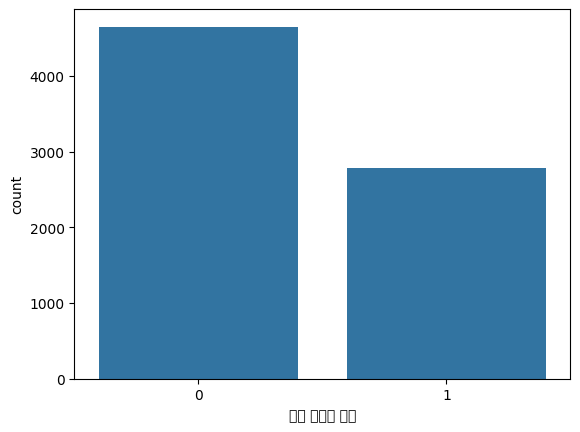

In [43]:
sns.barplot(train_no_target_vc)

채무 불이행 여부를 봤을 때 데이터 불균형이 심하진 않다. 이정도면 언더샘플링이나 오버샘플링을 일단 하지 않아도 될듯.\
모델링 했을 땐 달라질 수도 있다.

In [44]:
train_no_c

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0


In [45]:
train_no_c['신용 점수'].describe()

count   7432.00000
mean     744.53916
std       52.49681
min      571.00000
25%      704.00000
50%      755.00000
75%      793.00000
max      825.00000
Name: 신용 점수, dtype: float64

In [46]:
train_no_c['credit rating range'] = np.where(train_no_c['신용 점수'] > 800, 800,
                                    np.where(train_no_c['신용 점수'] > 700, 700,
                                    np.where(train_no_c['신용 점수'] > 600, 600, 500)))

In [47]:
train_no_c

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,credit rating range
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1,700
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0,700
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3,700
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1,700
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1,700
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0,700
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0,700
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0,700


In [48]:
credit_range_vc = train_no_c['credit rating range'].value_counts()

In [49]:
credit_range_vc

credit rating range
700    4905
600    1656
800     787
500      84
Name: count, dtype: int64

<Axes: xlabel='credit rating range', ylabel='count'>

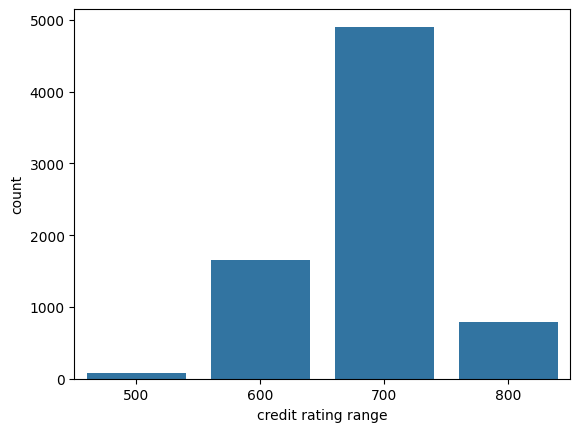

In [50]:
sns.barplot(credit_range_vc)

신용점수를 구간별로 나누어 각 구간별로 데이터가 얼마나 있는지 시각화함.\
500점대는 별로 없고, 700점대에서 가장 많다.\
그리고 그 차이는 꽤 많이난다.\
버릴지 여부는 더 시각화 해보고 정해야할듯.(일단 이상치는 제거한 상태니까)

In [51]:
train_no_copy = train_no.copy()
train_no_copy

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간,채무 불이행 여부
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1,TRAIN_00000,자가,10년 이상,부채 통합,단기 상환,0
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0,TRAIN_00001,월세,10년 이상,부채 통합,단기 상환,0
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3,TRAIN_00002,월세,4년,부채 통합,단기 상환,1
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1,TRAIN_00003,월세,6년,부채 통합,단기 상환,1
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3,TRAIN_00006,자가,8년,부채 통합,단기 상환,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1,TRAIN_09993,월세,8년,부채 통합,단기 상환,1
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0,TRAIN_09995,주택 담보 대출 (거주 중),10년 이상,부채 통합,단기 상환,0
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0,TRAIN_09996,주택 담보 대출 (거주 중),2년,주택 개보수,장기 상환,0
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0,TRAIN_09997,주택 담보 대출 (거주 중),10년 이상,부채 통합,장기 상환,0


In [52]:
train_no_copy['credit_rating_range'] = np.where(train_no_copy['신용 점수'] > 800, 800,
                                    np.where(train_no_copy['신용 점수'] > 700, 700,
                                    np.where(train_no_copy['신용 점수'] > 600, 600, 500)))

In [53]:
train_no_copy

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간,채무 불이행 여부,credit_rating_range
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1,TRAIN_00000,자가,10년 이상,부채 통합,단기 상환,0,700
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0,TRAIN_00001,월세,10년 이상,부채 통합,단기 상환,0,700
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3,TRAIN_00002,월세,4년,부채 통합,단기 상환,1,700
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1,TRAIN_00003,월세,6년,부채 통합,단기 상환,1,700
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3,TRAIN_00006,자가,8년,부채 통합,단기 상환,1,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1,TRAIN_09993,월세,8년,부채 통합,단기 상환,1,700
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0,TRAIN_09995,주택 담보 대출 (거주 중),10년 이상,부채 통합,단기 상환,0,700
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0,TRAIN_09996,주택 담보 대출 (거주 중),2년,주택 개보수,장기 상환,0,700
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0,TRAIN_09997,주택 담보 대출 (거주 중),10년 이상,부채 통합,장기 상환,0,700


In [54]:
train_no_copy_500 = train_no_copy.query('credit_rating_range == 500')
train_no_copy_600 = train_no_copy.query('credit_rating_range == 600')
train_no_copy_700 = train_no_copy.query('credit_rating_range == 700')
train_no_copy_800 = train_no_copy.query('credit_rating_range == 800')

In [55]:
train_no_copy_700

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간,채무 불이행 여부,credit_rating_range
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1,TRAIN_00000,자가,10년 이상,부채 통합,단기 상환,0,700
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0,TRAIN_00001,월세,10년 이상,부채 통합,단기 상환,0,700
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3,TRAIN_00002,월세,4년,부채 통합,단기 상환,1,700
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1,TRAIN_00003,월세,6년,부채 통합,단기 상환,1,700
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3,TRAIN_00006,자가,8년,부채 통합,단기 상환,1,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7425,1294200.00000,13.00000,17.50000,266356.50000,7.00000,262972.50000,12522.00000,6700.50000,798.00000,5.00000,0,0,TRAIN_09991,자가,2년,주택 개보수,단기 상환,0,700
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1,TRAIN_09993,월세,8년,부채 통합,단기 상환,1,700
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0,TRAIN_09995,주택 담보 대출 (거주 중),10년 이상,부채 통합,단기 상환,0,700
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0,TRAIN_09996,주택 담보 대출 (거주 중),2년,주택 개보수,장기 상환,0,700


Text(0.5, 1.0, 'rating 800')

C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\ja

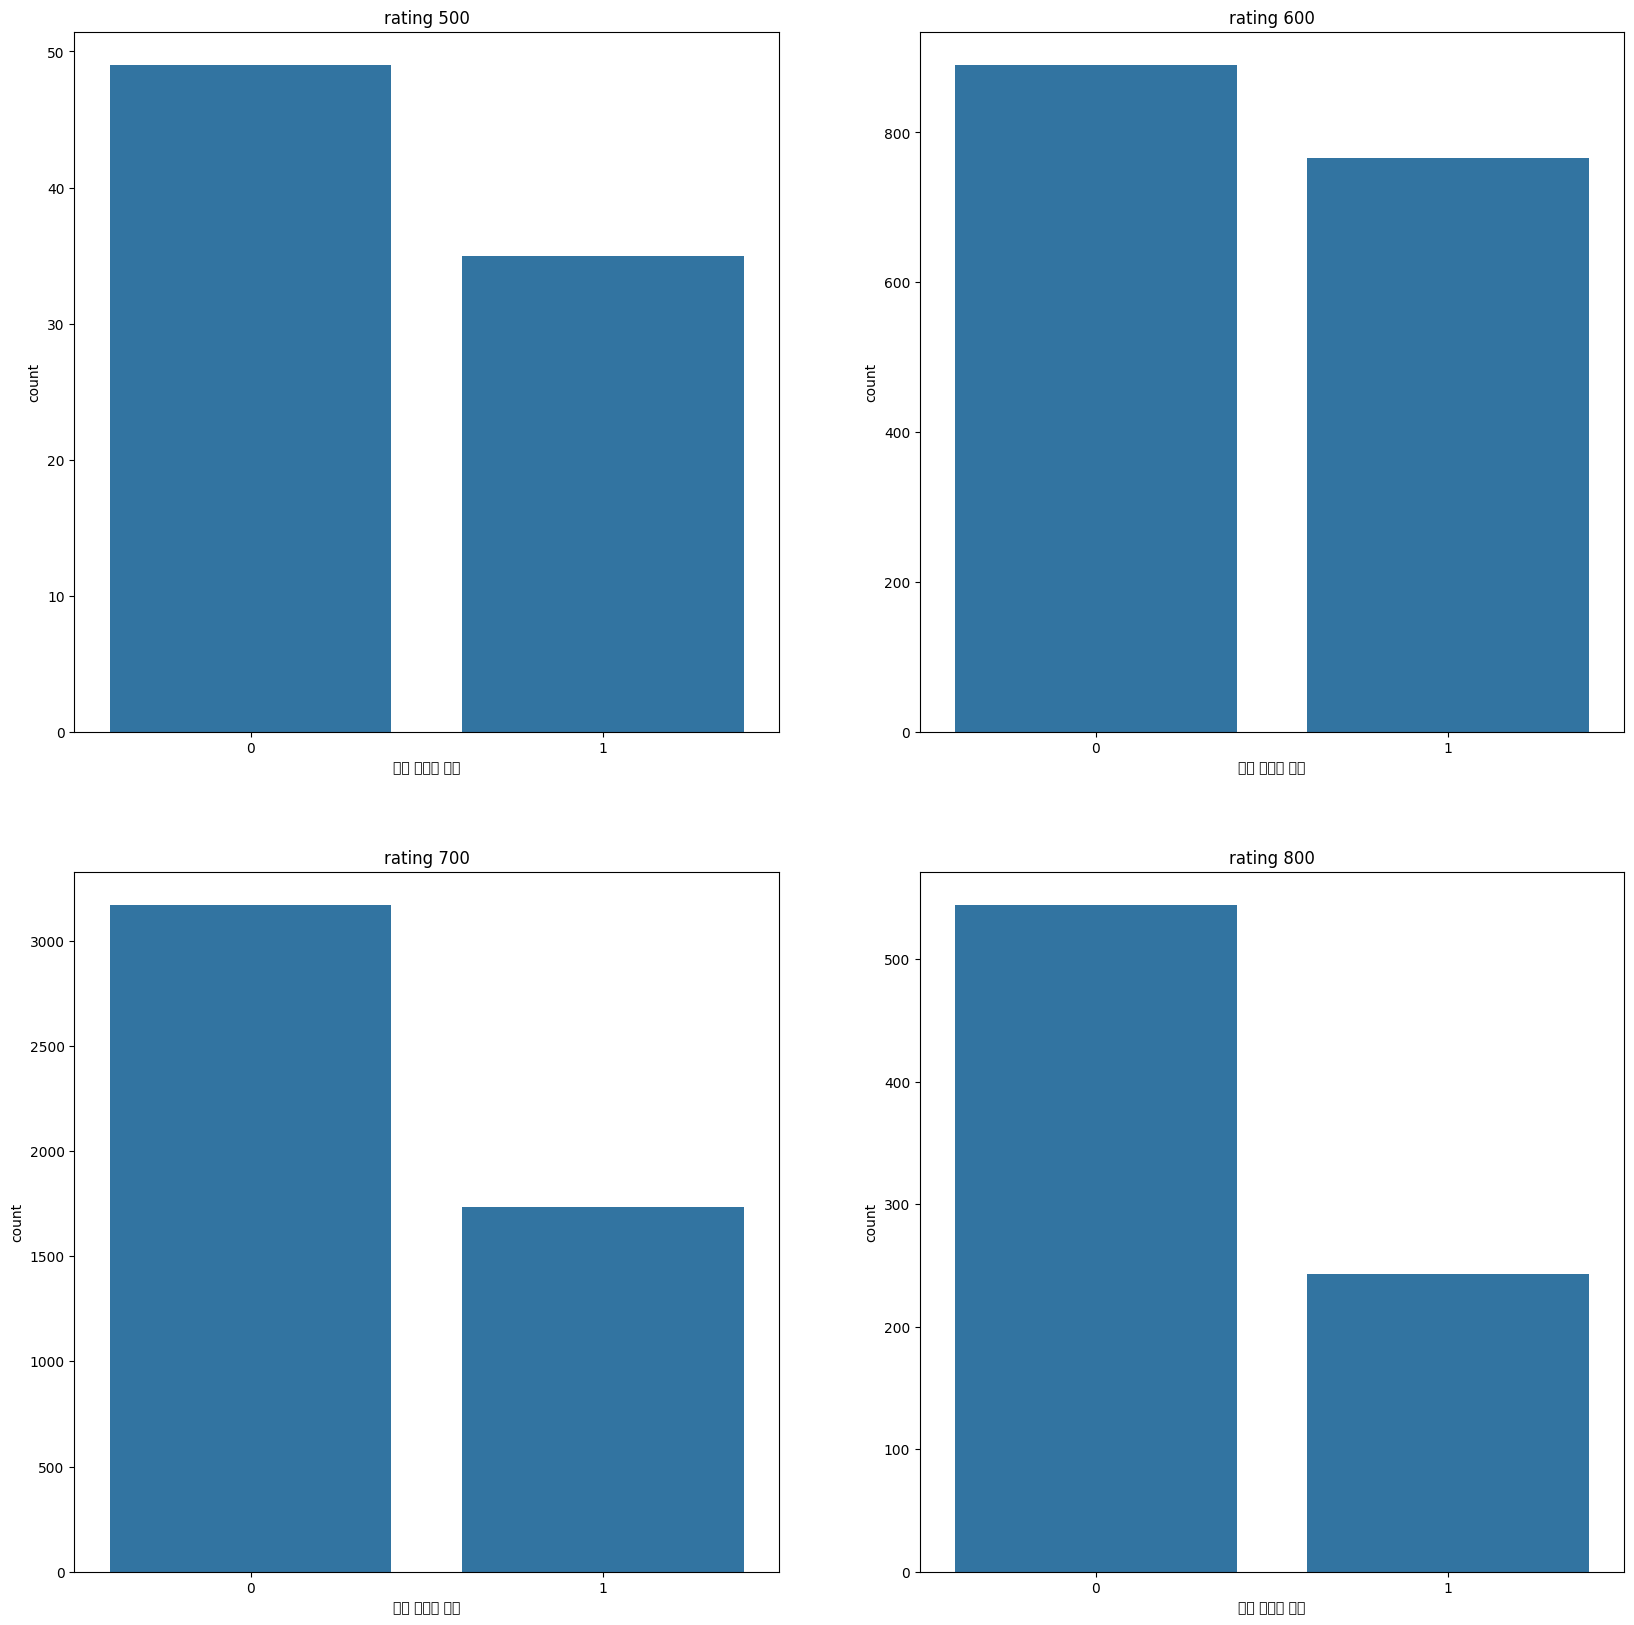

In [56]:
fig, axes = plt.subplots(2, 2, figsize = (20, 20))
sns.barplot(train_no_copy_500['채무 불이행 여부'].value_counts(), ax = axes[0, 0])
axes[0, 0].set_title('rating 500')
sns.barplot(train_no_copy_600['채무 불이행 여부'].value_counts(), ax = axes[0, 1])
axes[0, 1].set_title('rating 600')
sns.barplot(train_no_copy_700['채무 불이행 여부'].value_counts(), ax = axes[1, 0])
axes[1, 0].set_title('rating 700')
sns.barplot(train_no_copy_800['채무 불이행 여부'].value_counts(), ax = axes[1, 1])
axes[1, 1].set_title('rating 800')

신용점수 600대까지가 채무 불이행 비율이 높았다.\
500, 600대는 숫자가 적지만 채무 불이행 비율이 높은 만큼 이들을 함부로 버리면 안된다.

In [57]:
train_no_copy

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간,채무 불이행 여부,credit_rating_range
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1,TRAIN_00000,자가,10년 이상,부채 통합,단기 상환,0,700
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0,TRAIN_00001,월세,10년 이상,부채 통합,단기 상환,0,700
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3,TRAIN_00002,월세,4년,부채 통합,단기 상환,1,700
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1,TRAIN_00003,월세,6년,부채 통합,단기 상환,1,700
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3,TRAIN_00006,자가,8년,부채 통합,단기 상환,1,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1,TRAIN_09993,월세,8년,부채 통합,단기 상환,1,700
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0,TRAIN_09995,주택 담보 대출 (거주 중),10년 이상,부채 통합,단기 상환,0,700
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0,TRAIN_09996,주택 담보 대출 (거주 중),2년,주택 개보수,장기 상환,0,700
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0,TRAIN_09997,주택 담보 대출 (거주 중),10년 이상,부채 통합,장기 상환,0,700


In [58]:
train_no_copy['현재 직장 근속 연수'].unique()

array(['10년 이상', '4년', '6년', '8년', '2년', '3년', '5년', '9년', '1년 미만', '1년',
       '7년'], dtype=object)

In [59]:
train_no_copy['current_range_employment'] = np.where(train_no_copy['현재 직장 근속 연수'] == '10년 이상', 10,
                                            np.where(train_no_copy['현재 직장 근속 연수'] == '9년', 9,
                                            np.where(train_no_copy['현재 직장 근속 연수'] == '8년', 8,
                                            np.where(train_no_copy['현재 직장 근속 연수'] == '7년', 7,
                                            np.where(train_no_copy['현재 직장 근속 연수'] == '6년', 6,
                                            np.where(train_no_copy['현재 직장 근속 연수'] == '5년', 5,
                                            np.where(train_no_copy['현재 직장 근속 연수'] == '4년', 4,
                                            np.where(train_no_copy['현재 직장 근속 연수'] == '3년', 3,
                                            np.where(train_no_copy['현재 직장 근속 연수'] == '2년', 2,
                                            np.where(train_no_copy['현재 직장 근속 연수'] == '1년', 1, 0))))))))))
train_no_copy

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간,채무 불이행 여부,credit_rating_range,current_range_employment
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1,TRAIN_00000,자가,10년 이상,부채 통합,단기 상환,0,700,10
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0,TRAIN_00001,월세,10년 이상,부채 통합,단기 상환,0,700,10
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3,TRAIN_00002,월세,4년,부채 통합,단기 상환,1,700,4
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1,TRAIN_00003,월세,6년,부채 통합,단기 상환,1,700,6
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3,TRAIN_00006,자가,8년,부채 통합,단기 상환,1,700,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1,TRAIN_09993,월세,8년,부채 통합,단기 상환,1,700,8
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0,TRAIN_09995,주택 담보 대출 (거주 중),10년 이상,부채 통합,단기 상환,0,700,10
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0,TRAIN_09996,주택 담보 대출 (거주 중),2년,주택 개보수,장기 상환,0,700,2
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0,TRAIN_09997,주택 담보 대출 (거주 중),10년 이상,부채 통합,장기 상환,0,700,10


<Axes: xlabel='current_range_employment', ylabel='count'>

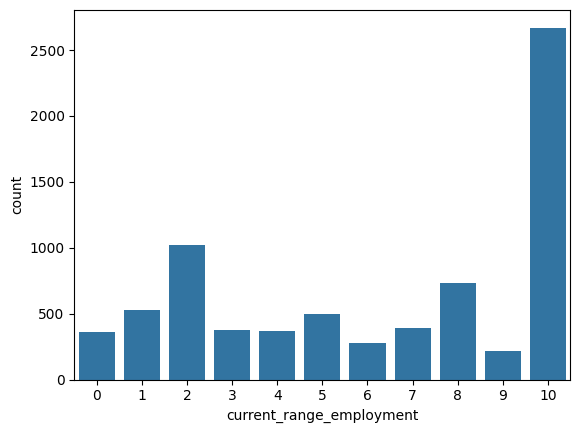

In [60]:
sns.barplot(train_no_copy['current_range_employment'].value_counts())

현재 근속 연수를 구간별로 나눠 시각화를 했을 때 10년 이상인 데이터가 가장 많았다.

In [61]:
train_no_copy_10 = train_no_copy.query('current_range_employment == 10')
train_no_copy_9 = train_no_copy.query('current_range_employment == 9')
train_no_copy_8 = train_no_copy.query('current_range_employment == 8')
train_no_copy_7 = train_no_copy.query('current_range_employment == 7')
train_no_copy_6 = train_no_copy.query('current_range_employment == 6')
train_no_copy_5 = train_no_copy.query('current_range_employment == 5')
train_no_copy_4 = train_no_copy.query('current_range_employment == 4')
train_no_copy_3 = train_no_copy.query('current_range_employment == 3')
train_no_copy_2 = train_no_copy.query('current_range_employment == 2')
train_no_copy_1 = train_no_copy.query('current_range_employment == 1')
train_no_copy_0 = train_no_copy.query('current_range_employment == 0')

Text(0.5, 1.0, 'current 0 years')

C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\ja

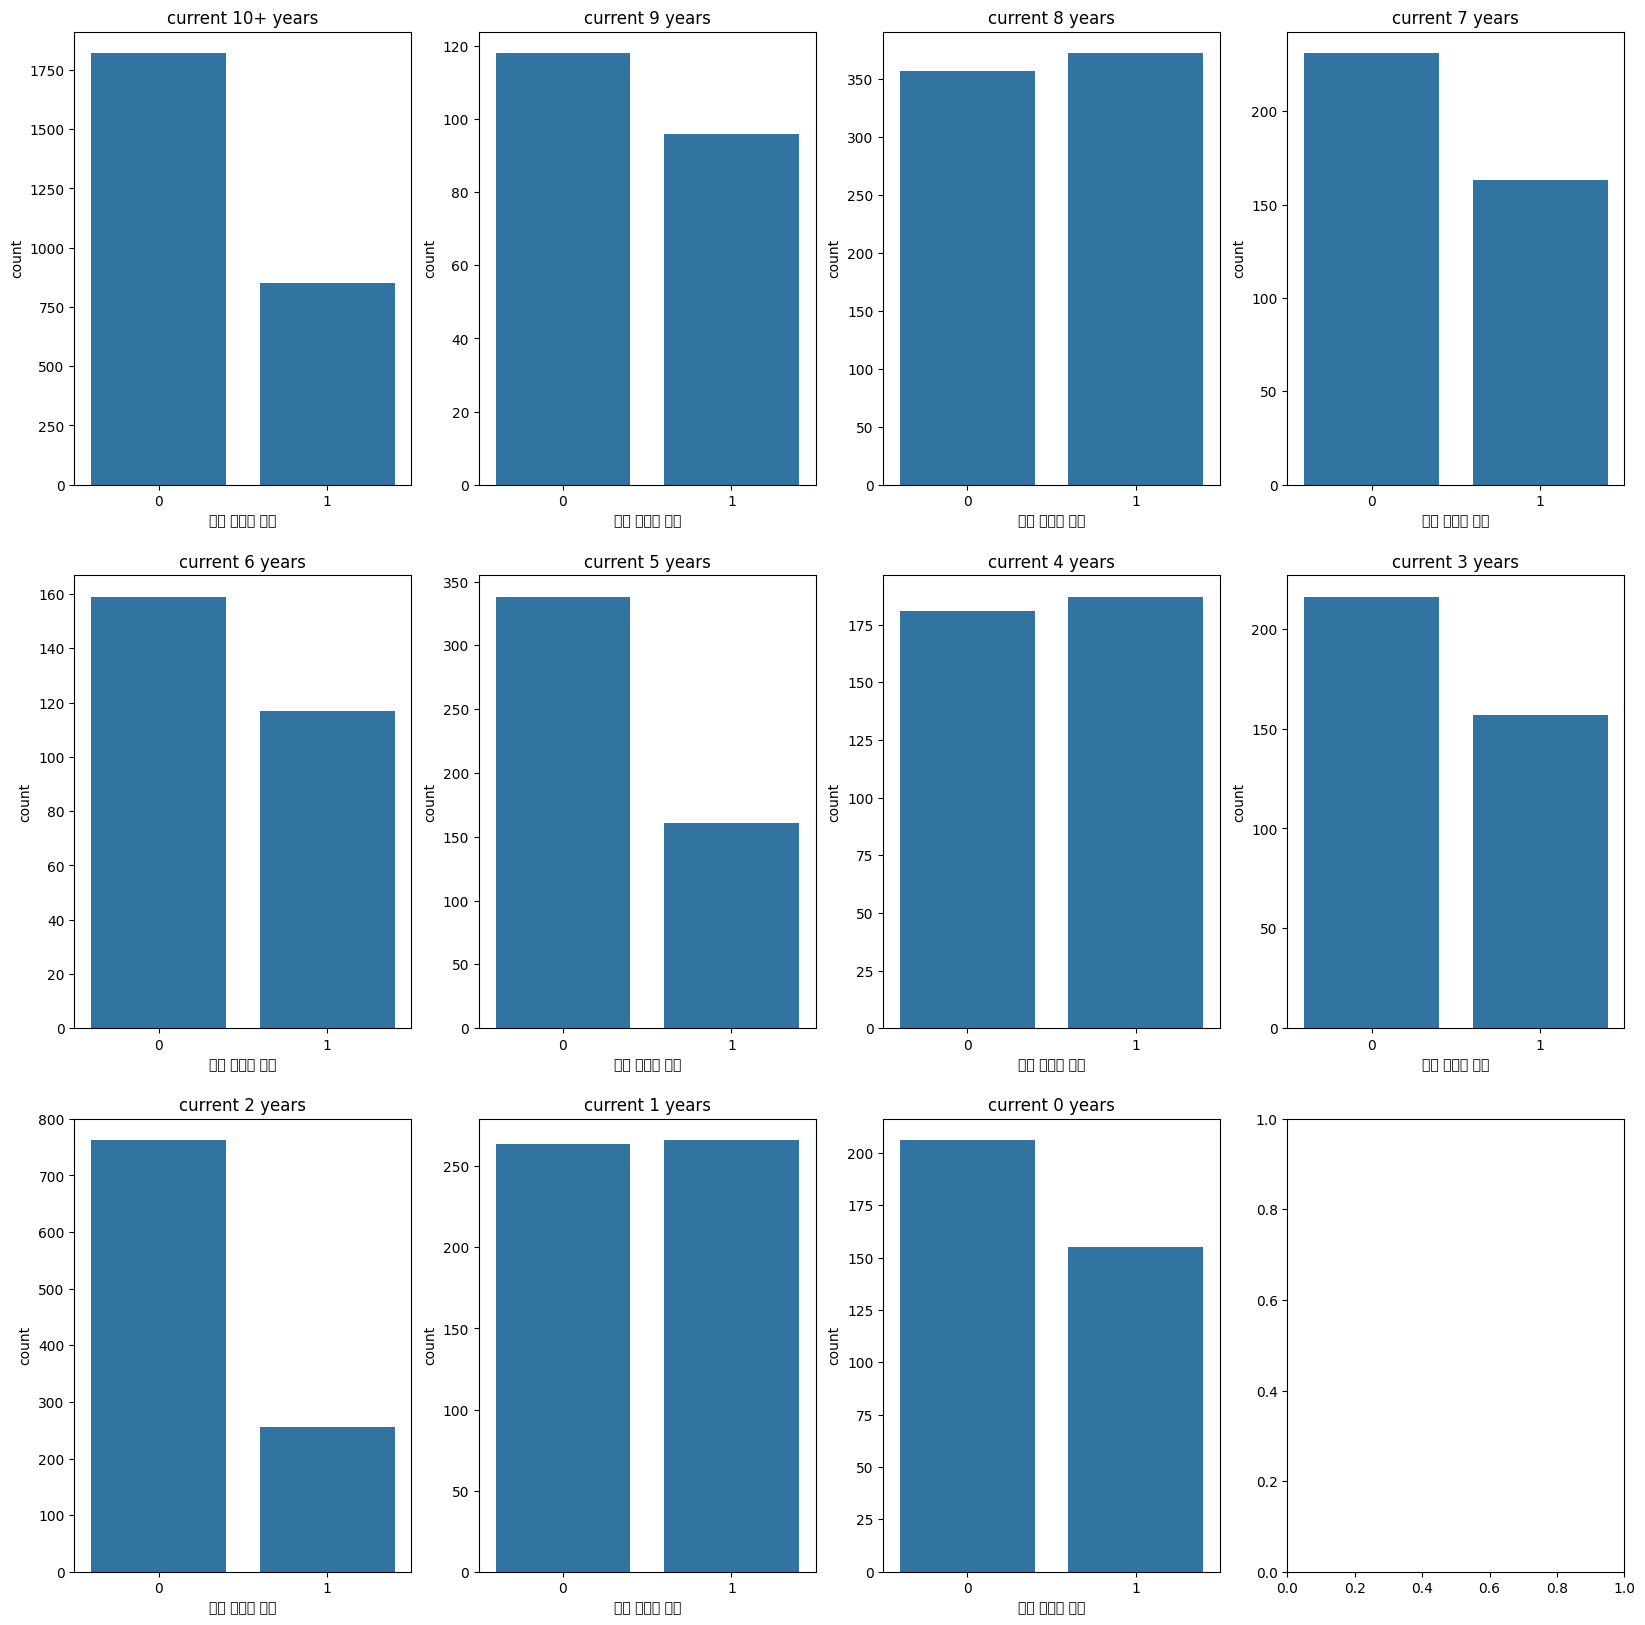

In [62]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
sns.barplot(train_no_copy_10['채무 불이행 여부'].value_counts(), ax = axes[0, 0])
axes[0, 0].set_title('current 10+ years')
sns.barplot(train_no_copy_9['채무 불이행 여부'].value_counts(), ax = axes[0, 1])
axes[0, 1].set_title('current 9 years')
sns.barplot(train_no_copy_8['채무 불이행 여부'].value_counts(), ax = axes[0, 2])
axes[0, 2].set_title('current 8 years')
sns.barplot(train_no_copy_7['채무 불이행 여부'].value_counts(), ax = axes[0, 3])
axes[0, 3].set_title('current 7 years')
sns.barplot(train_no_copy_6['채무 불이행 여부'].value_counts(), ax = axes[1, 0])
axes[1, 0].set_title('current 6 years')
sns.barplot(train_no_copy_5['채무 불이행 여부'].value_counts(), ax = axes[1, 1])
axes[1, 1].set_title('current 5 years')
sns.barplot(train_no_copy_4['채무 불이행 여부'].value_counts(), ax = axes[1, 2])
axes[1, 2].set_title('current 4 years')
sns.barplot(train_no_copy_3['채무 불이행 여부'].value_counts(), ax = axes[1, 3])
axes[1, 3].set_title('current 3 years')
sns.barplot(train_no_copy_2['채무 불이행 여부'].value_counts(), ax = axes[2, 0])
axes[2, 0].set_title('current 2 years')
sns.barplot(train_no_copy_1['채무 불이행 여부'].value_counts(), ax = axes[2, 1])
axes[2, 1].set_title('current 1 years')
sns.barplot(train_no_copy_0['채무 불이행 여부'].value_counts(), ax = axes[2, 2])
axes[2, 2].set_title('current 0 years')

시각화를 했을 때 근속 연수와 채무 불이행 여부는 큰 상관이 없는거 같다.

In [63]:
train_no_copy

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간,채무 불이행 여부,credit_rating_range,current_range_employment
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1,TRAIN_00000,자가,10년 이상,부채 통합,단기 상환,0,700,10
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0,TRAIN_00001,월세,10년 이상,부채 통합,단기 상환,0,700,10
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3,TRAIN_00002,월세,4년,부채 통합,단기 상환,1,700,4
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1,TRAIN_00003,월세,6년,부채 통합,단기 상환,1,700,6
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3,TRAIN_00006,자가,8년,부채 통합,단기 상환,1,700,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1,TRAIN_09993,월세,8년,부채 통합,단기 상환,1,700,8
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0,TRAIN_09995,주택 담보 대출 (거주 중),10년 이상,부채 통합,단기 상환,0,700,10
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0,TRAIN_09996,주택 담보 대출 (거주 중),2년,주택 개보수,장기 상환,0,700,2
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0,TRAIN_09997,주택 담보 대출 (거주 중),10년 이상,부채 통합,장기 상환,0,700,10


In [64]:
train_no_copy['대출 목적'].unique()

array(['부채 통합', '자동차 구매', '기타', '사업 대출', '주택 개보수', '여행 자금', '소규모 사업 자금',
       '교육비', '의료비', '결혼 자금', '고액 구매', '주택 구매', '이사 비용', '휴가 비용'],
      dtype=object)

In [65]:
train_no_copy['주거 형태'].unique()

array(['자가', '월세', '주택 담보 대출 (거주 중)', '주택 담보 대출 (비거주 중)'], dtype=object)

In [66]:
train_no_copy['대출 상환 기간'].unique()

array(['단기 상환', '장기 상환'], dtype=object)

이 세 변수들은 일단 라벨인코딩 하고 시각화를 해본 후 어떻게 처리할지 결정해야할듯

In [67]:
train_no_copy['purpose'] = np.where(train_no_copy['대출 목적'] == '부채 통합', 14,
                            np.where(train_no_copy['대출 목적'] == '자동차 구매', 13,
                            np.where(train_no_copy['대출 목적'] == '기타', 12,
                            np.where(train_no_copy['대출 목적'] == '사업 대출', 11,
                            np.where(train_no_copy['대출 목적'] == '주택 개보수', 10,
                            np.where(train_no_copy['대출 목적'] == '여행 자금', 9,
                            np.where(train_no_copy['대출 목적'] == '소규모 사업 자금', 8,
                            np.where(train_no_copy['대출 목적'] == '교육비', 7,
                            np.where(train_no_copy['대출 목적'] == '의료비', 6,
                            np.where(train_no_copy['대출 목적'] == '결혼 자금', 5,
                            np.where(train_no_copy['대출 목적'] == '고액 구매', 4,
                            np.where(train_no_copy['대출 목적'] == '주택 구매', 3,
                            np.where(train_no_copy['대출 목적'] == '이사 비용', 2, 1)))))))))))))

In [68]:
train_no_debt_con = train_no_copy.query('purpose == 14')
train_no_car = train_no_copy.query('purpose == 13')
train_no_etc = train_no_copy.query('purpose == 12')
train_no_biz = train_no_copy.query('purpose == 11')
train_no_fixhome = train_no_copy.query('purpose == 10')
train_no_travel = train_no_copy.query('purpose == 9')
train_no_smallbiz = train_no_copy.query('purpose == 8')
train_no_study = train_no_copy.query('purpose == 7')
train_no_medi = train_no_copy.query('purpose == 6')
train_no_marriage = train_no_copy.query('purpose == 5')
train_no_luxury = train_no_copy.query('purpose == 4')
train_no_house = train_no_copy.query('purpose == 3')
train_no_moving = train_no_copy.query('purpose == 2')
train_no_vacation = train_no_copy.query('purpose == 1')

Text(0.5, 1.0, 'vacation')

C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\ja

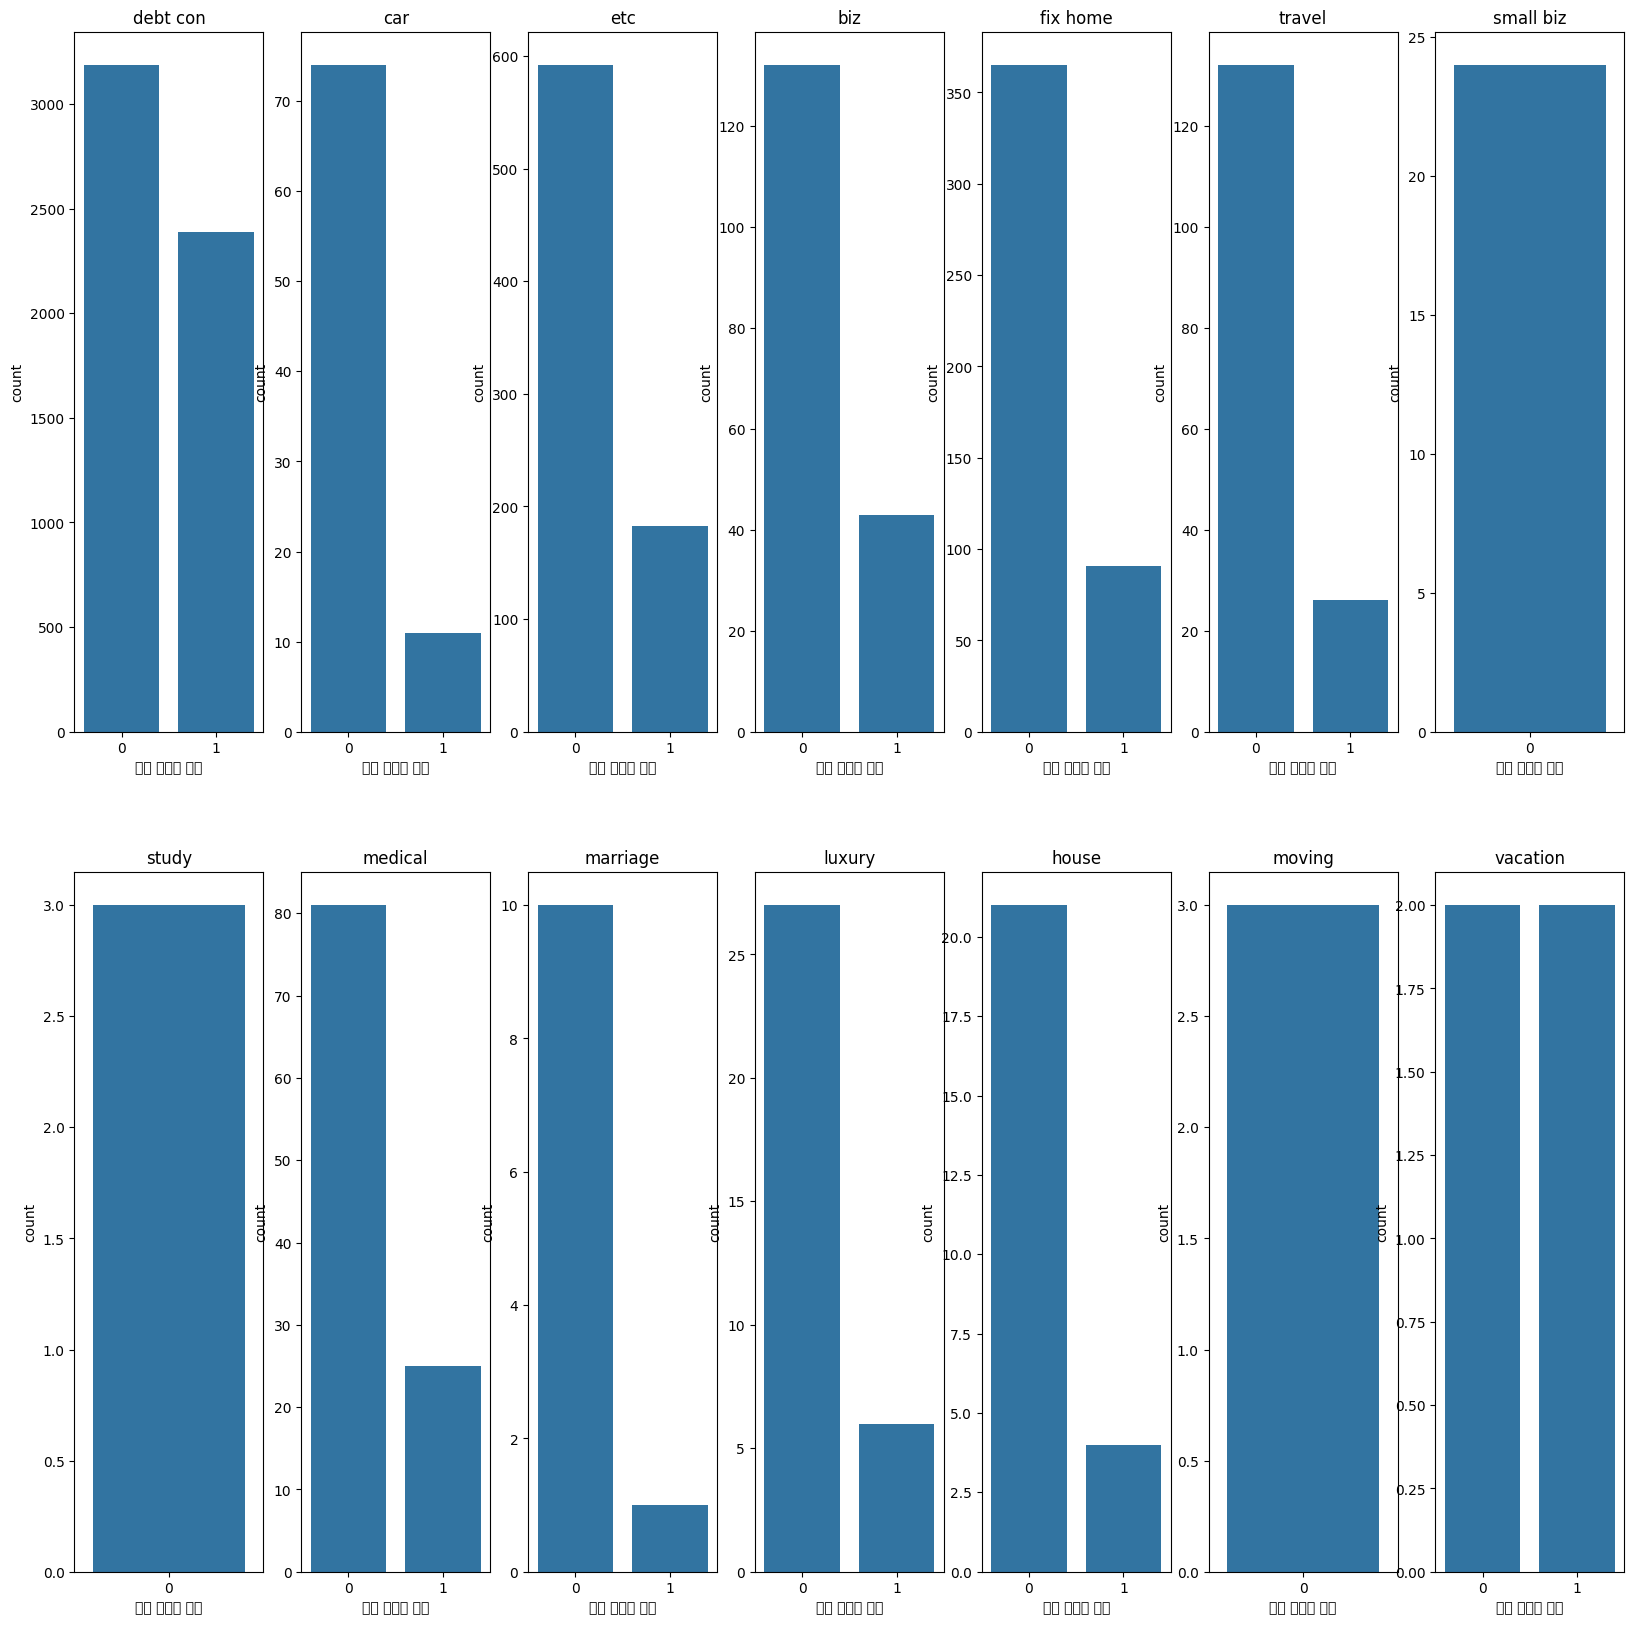

In [69]:
fig, axes = plt.subplots(2, 7, figsize = (20, 20))
sns.barplot(train_no_debt_con['채무 불이행 여부'].value_counts(), ax = axes[0, 0])
axes[0, 0].set_title('debt con')
sns.barplot(train_no_car['채무 불이행 여부'].value_counts(), ax = axes[0, 1])
axes[0, 1].set_title('car')
sns.barplot(train_no_etc['채무 불이행 여부'].value_counts(), ax = axes[0, 2])
axes[0, 2].set_title('etc')
sns.barplot(train_no_biz['채무 불이행 여부'].value_counts(), ax = axes[0, 3])
axes[0, 3].set_title('biz')
sns.barplot(train_no_fixhome['채무 불이행 여부'].value_counts(), ax = axes[0, 4])
axes[0, 4].set_title('fix home')
sns.barplot(train_no_travel['채무 불이행 여부'].value_counts(), ax = axes[0, 5])
axes[0, 5].set_title('travel')
sns.barplot(train_no_smallbiz['채무 불이행 여부'].value_counts(), ax = axes[0, 6])
axes[0, 6].set_title('small biz')
sns.barplot(train_no_study['채무 불이행 여부'].value_counts(), ax = axes[1, 0])
axes[1, 0].set_title('study')
sns.barplot(train_no_medi['채무 불이행 여부'].value_counts(), ax = axes[1, 1])
axes[1, 1].set_title('medical')
sns.barplot(train_no_marriage['채무 불이행 여부'].value_counts(), ax = axes[1, 2])
axes[1, 2].set_title('marriage')
sns.barplot(train_no_luxury['채무 불이행 여부'].value_counts(), ax = axes[1, 3])
axes[1, 3].set_title('luxury')
sns.barplot(train_no_house['채무 불이행 여부'].value_counts(), ax = axes[1, 4])
axes[1, 4].set_title('house')
sns.barplot(train_no_moving['채무 불이행 여부'].value_counts(), ax = axes[1, 5])
axes[1, 5].set_title('moving')
sns.barplot(train_no_vacation['채무 불이행 여부'].value_counts(), ax = axes[1, 6])
axes[1, 6].set_title('vacation')

In [70]:
train_no_smallbiz['채무 불이행 여부'].unique()

array([0], dtype=int64)

In [71]:
train_no_study['채무 불이행 여부'].unique()

array([0], dtype=int64)

In [72]:
train_no_moving['채무 불이행 여부'].unique()

array([0], dtype=int64)

소규모 사업, 교육, 이사 목적의 대출의 경우 수 자체도 적지만 채무 불이행이 아예 없었다.\
또한 부채 통합 목적이 수가 압도적으로 많고 채무 불이행도 압도적으로 많았다.

In [73]:
train_no_copy['주거 형태'].unique()

array(['자가', '월세', '주택 담보 대출 (거주 중)', '주택 담보 대출 (비거주 중)'], dtype=object)

In [74]:
train_no_copy['house_type'] = np.where(train_no_copy['주거 형태'] == '자가', 0,
                                np.where(train_no_copy['주거 형태'] == '월세', 1,
                                np.where(train_no_copy['주거 형태'] == '주택 담보 대출 (거주 중)', 2, 3)))

In [75]:
train_no_own = train_no_copy.query('house_type == 0')
train_no_monthly = train_no_copy.query('house_type == 1')
train_no_mortgage_current = train_no_copy.query('house_type == 2')
train_no_mortgage_nocurrent = train_no_copy.query('house_type == 3')

Text(0.5, 1.0, 'mortgage currnet no living')

C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\ja

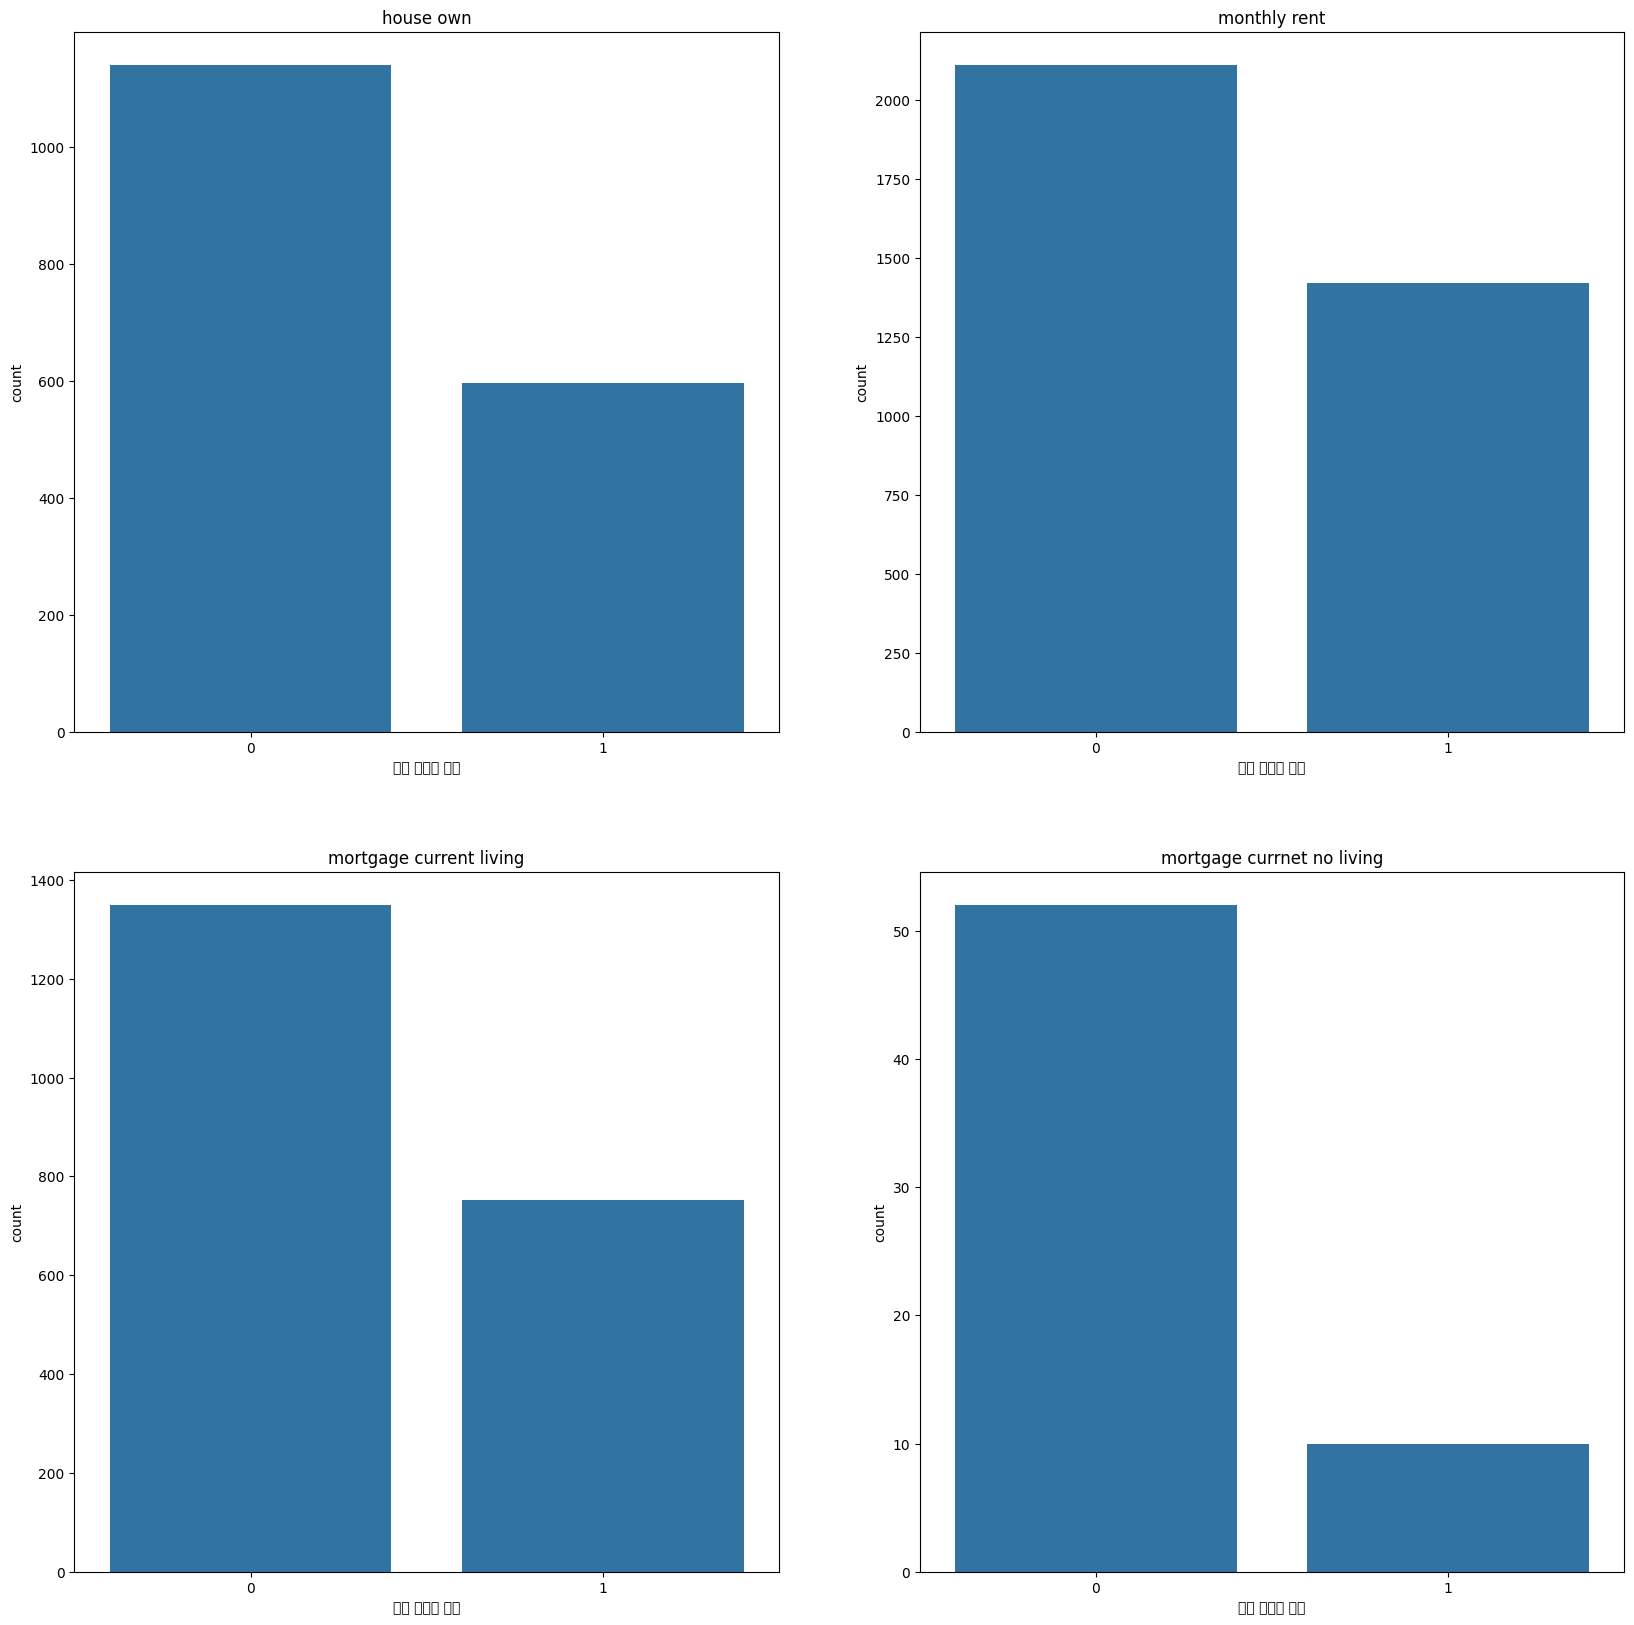

In [76]:
fig, axes = plt.subplots(2, 2, figsize = (20, 20))
sns.barplot(train_no_own['채무 불이행 여부'].value_counts(), ax = axes[0, 0])
axes[0, 0].set_title('house own')
sns.barplot(train_no_monthly['채무 불이행 여부'].value_counts(), ax = axes[0, 1])
axes[0, 1].set_title('monthly rent')
sns.barplot(train_no_mortgage_current['채무 불이행 여부'].value_counts(), ax = axes[1, 0])
axes[1, 0].set_title('mortgage current living')
sns.barplot(train_no_mortgage_nocurrent['채무 불이행 여부'].value_counts(), ax = axes[1, 1])
axes[1, 1].set_title('mortgage currnet no living')

주거 형태의 경우 월세일 때 채무 불이행이 가장 높았고, 자가일 때 가장 낮았다.\
주택 담보 대출(비거주중)인 경우 수 자체가 적어서 논외로 봐야할 듯.\
그 외엔 수가 충분히 있다 생각되고, 비율도 다들 비슷하다.

In [77]:
train_no_copy

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,...,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간,채무 불이행 여부,credit_rating_range,current_range_employment,purpose,house_type
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,...,TRAIN_00000,자가,10년 이상,부채 통합,단기 상환,0,700,10,14,0
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,...,TRAIN_00001,월세,10년 이상,부채 통합,단기 상환,0,700,10,14,1
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,...,TRAIN_00002,월세,4년,부채 통합,단기 상환,1,700,4,14,1
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,...,TRAIN_00003,월세,6년,부채 통합,단기 상환,1,700,6,14,1
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,...,TRAIN_00006,자가,8년,부채 통합,단기 상환,1,700,8,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,...,TRAIN_09993,월세,8년,부채 통합,단기 상환,1,700,8,14,1
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,...,TRAIN_09995,주택 담보 대출 (거주 중),10년 이상,부채 통합,단기 상환,0,700,10,14,2
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,...,TRAIN_09996,주택 담보 대출 (거주 중),2년,주택 개보수,장기 상환,0,700,2,10,2
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,...,TRAIN_09997,주택 담보 대출 (거주 중),10년 이상,부채 통합,장기 상환,0,700,10,14,2


왜도, 첨도를 구해 데이터 분포 형태를 파악.\
시각화 이전에 해야했지만 지금이라도 해야할듯.

In [78]:
from scipy.stats import skew, kurtosis

In [79]:
train_no_copy.columns

Index(['연간 소득', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도', '마지막 연체 이후 경과 개월 수',
       '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '체납 세금 압류 횟수',
       '신용 문제 발생 횟수', '개인 파산 횟수', 'UID', '주거 형태', '현재 직장 근속 연수', '대출 목적',
       '대출 상환 기간', '채무 불이행 여부', 'credit_rating_range',
       'current_range_employment', 'purpose', 'house_type'],
      dtype='object')

In [80]:
train_no_num = train_no_copy[['연간 소득', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도', '마지막 연체 이후 경과 개월 수',
       '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '체납 세금 압류 횟수',
       '신용 문제 발생 횟수', '개인 파산 횟수', 'credit_rating_range',
       'current_range_employment', 'purpose', 'house_type']]

In [81]:
skew(train_no_num)

array([ 1.08648073,  0.64543626,  0.91827422,  0.30074092,  0.57756394,
        0.52256455,  0.91224444,  0.69351507, -0.72908233,  5.53250824,
        2.77765959,  2.20272107, -0.26658554, -0.33535678, -2.702081  ,
        0.01953296])

In [82]:
from getskewkurtosis import GetSkew, GetKurtosis
GetSkew(train_no_num)

['연간 소득 = 1.0864807326485035',
 '개설된 신용계좌 수 = 0.6454362561531092',
 '신용 거래 연수 = 0.9182742217367953',
 '최대 신용한도 = 0.3007409211632',
 '마지막 연체 이후 경과 개월 수 = 0.5775639449732836',
 '현재 대출 잔액 = 0.5225645477738209',
 '현재 미상환 신용액 = 0.9122444364939819',
 '월 상환 부채액 = 0.6935150727245146',
 '신용 점수 = -0.7290823322199949',
 '체납 세금 압류 횟수 = 5.532508240251268',
 '신용 문제 발생 횟수 = 2.777659587384856',
 '개인 파산 횟수 = 2.2027210657947753',
 'credit_rating_range = -0.26658554343053736',
 'current_range_employment = -0.3353567773360179',
 'purpose = -2.7020809978392033',
 'house_type = 0.019532962758330368']

왜도를 봤을 때 연간 소득, 개설된 신용계좌 수, 신용거래연수, 최대신용한도, 마지막 연체 이후 경과 개월 수, 현재 대출 잔액, 현재 미상환 신용액, 월 상환 부채액, 체납 세금 압류 횟수, 신용 문제 발생 횟수, 개인 파산 횟수는 왼쪽으로 치우쳐짐.\
신용 점수, credit_rating_range, current_range_employment, purpose는 오른쪽으로 치우쳐짐.\
특히 체남 세금 압류 횟수, 신용 문제 발생 횟수, 개인 파산 횟수는 심각하게 왼쪽으로 치우쳐져있음.\
purpose, house_type은 라벨인코딩을 한 경우긴한데 그래도 일단 사람들이 어느 한 쪽으로 치우쳐져 있다는 의미가 된다.\
house_type은 비교적 정규분포에 매우 가깝다.

In [83]:
GetKurtosis(train_no_num)

['연간 소득 = 1.388612710743712',
 '개설된 신용계좌 수 = 0.3472645345277119',
 '신용 거래 연수 = 0.363109072311369',
 '최대 신용한도 = -0.24467006614801656',
 '마지막 연체 이후 경과 개월 수 = -0.5927798831163202',
 '현재 대출 잔액 = 0.09744971433325533',
 '현재 미상환 신용액 = 0.5396405416160612',
 '월 상환 부채액 = 0.06864649786325838',
 '신용 점수 = -0.2393757230780662',
 '체납 세금 압류 횟수 = 35.9458591505055',
 '신용 문제 발생 횟수 = 8.078601040074965',
 '개인 파산 횟수 = 3.595781944885724',
 'credit_rating_range = 0.47323478780877837',
 'current_range_employment = -1.4542447670371772',
 'purpose = 8.363293510615918',
 'house_type = -0.870904705000525']

In [84]:
train_no_num['credit_rating_range'].mean()

686.0468245425188

In [85]:
train_no_num['credit_rating_range'].describe()

count   7432.00000
mean     686.04682
std       59.54008
min      500.00000
25%      700.00000
50%      700.00000
75%      700.00000
max      800.00000
Name: credit_rating_range, dtype: float64

첨도를 구했을 땐 연간 소득, 개설된 신용계좌 수, 현재 비상환 신용액, 체납 세금 압류 횟수, 개인 파산 횟수, credit_rating_range, purpose는 위로 뾰족하다.\
특히 연간 소득, 체납 세금 압류 횟수, 신용 문제 발생 횟수, 개인 파산 횟수, purpose는 특히 더 위로 뾰족하다.\
최대 신용한도, 신용 점수, current_range_employment, house_type은 아래로 뾰족하다.(정규분포보다)\
특이한 점은 credit_rating_range는 정규분포보다 위로 향하는데 신용 점수는 정규분포보다 더 아래로 뾰족하다는 것이다.\
이 경우 credit_rating_range 평균보다 높은 값들이 많다는 의미다. 그 결과 이상치로 인식된 값들이 있다는 것이다.\
이러한 경우는 700, 800대의 사람들이 많다고 보면 될거같다.\
실제로 describe를 했을 때 25%값이 700이었다.\
현재 대출 잔액, 월 상환 부채액의 경우 비교적 정규분포와 가깝다

첨도를 봤을 때 연간 소득, 개설된 신용계좌 수, 현재 비상환 신용액, 체납 세금 압류 횟수, 개인 파산 횟수는 이상치가 제대로 제거되진 않은거같다.\
박스그래프를 그려서 한번 더 살펴봐야 할듯.\
특히 연간 소득, 체납 세금 압류 횟수, 신용 문제 발생 횟수, 개인파산횟수는 이상치가 특히 더 남아있다고 봐야할듯.\

c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

Text(0.5, 1.0, 'credit rating rage')

C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\

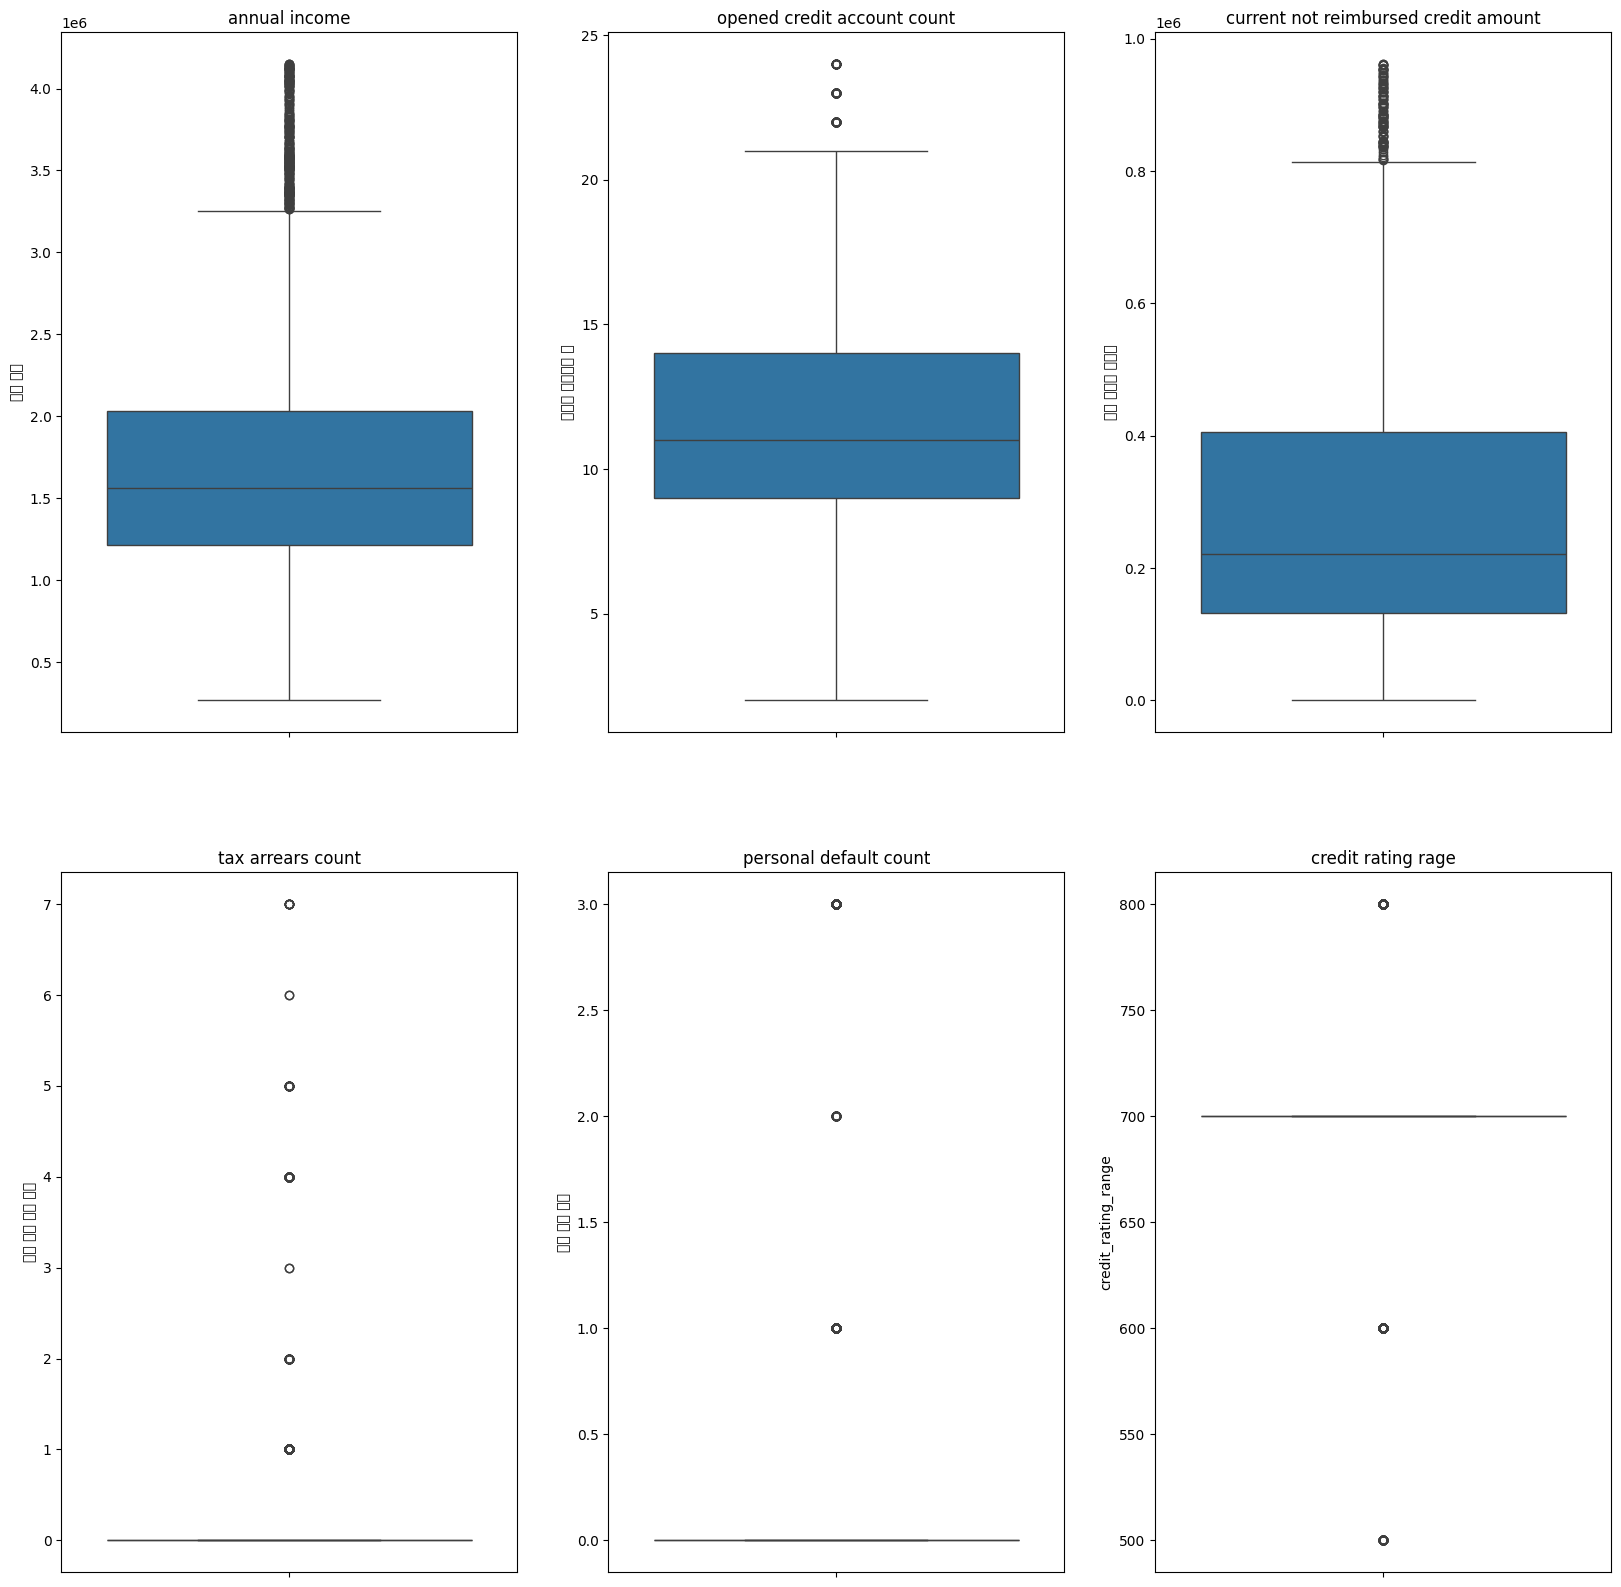

In [86]:
fig, axes = plt.subplots(2, 3, figsize = (20, 20))
sns.boxplot(train_no_num['연간 소득'], ax = axes[0, 0])
axes[0, 0].set_title('annual income')
sns.boxplot(train_no_num['개설된 신용계좌 수'], ax = axes[0, 1])
axes[0, 1].set_title('opened credit account count')
sns.boxplot(train_no_num['현재 미상환 신용액'], ax = axes[0, 2])
axes[0, 2].set_title('current not reimbursed credit amount')
sns.boxplot(train_no_num['체납 세금 압류 횟수'], ax = axes[1, 0])
axes[1, 0].set_title('tax arrears count')
sns.boxplot(train_no_num['개인 파산 횟수'], ax = axes[1, 1])
axes[1, 1].set_title('personal default count')
sns.boxplot(train_no_num['credit_rating_range'], ax = axes[1, 2])
axes[1, 2].set_title('credit rating rage')

IQR을 이용해 이상치를 제거하려 했지만 제거가 제대로 되진 않은거같다.\
이러한 경우엔 다른 값을 기준으로 이상치를 제거해야한다.

이번엔 z-score를 이용해 이상치를 제거해보기로 했다.\
사분위수를 활용해 이상치를 제거했을 때 제대로 제거되지 않은 값들이 있었기 때문.

In [87]:
train_no_num.describe()

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,credit_rating_range,current_range_employment,purpose,house_type
count,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000
mean,1688256.93286,11.53794,18.37816,662908.00007,32.32347,416172.75202,273393.75646,18329.73661,744.53916,0.17882,0.63872,0.41227,686.04682,6.25996,13.11477,1.06580
std,669132.04418,3.96410,6.07829,392119.97661,20.19541,191230.79409,187049.52633,11427.66731,52.49681,0.66935,1.22784,0.88261,59.54008,3.58145,1.88132,0.73869
min,267621.00000,2.00000,6.00000,0.00000,0.00000,29176.50000,0.00000,0.00000,571.00000,0.00000,0.00000,0.00000,500.00000,0.00000,1.00000,0.00000
25%,1216819.87500,9.00000,14.00000,372830.25000,15.00000,261567.00000,131962.50000,9448.50000,704.00000,0.00000,0.00000,0.00000,700.00000,2.00000,13.75000,1.00000
50%,1562599.50000,11.00000,16.90000,653271.00000,29.00000,409183.50000,220593.75000,16341.75000,755.00000,0.00000,0.00000,0.00000,700.00000,7.00000,14.00000,1.00000
75%,2033371.12500,14.00000,21.70000,931728.00000,44.00000,528106.12500,405697.12500,25848.00000,793.00000,0.00000,1.00000,0.00000,700.00000,10.00000,14.00000,2.00000
max,4149865.50000,24.00000,38.20000,2173570.50000,81.00000,1028950.50000,961791.00000,60210.00000,825.00000,7.00000,7.00000,3.00000,800.00000,10.00000,14.00000,3.00000


In [88]:
train_num_del = train_num_c_drop.copy()

In [89]:
from deloutlier import DelOutlierZscore
train_num_del_z = DelOutlierZscore(train_num_del)
train_num_del_z

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000
6,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000
...,...,...,...,...,...,...,...,...,...
9993,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000
9995,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000
9996,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000
9997,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000


In [90]:
train_num_del_z.describe()

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
count,7309.00000,7309.00000,7309.00000,7309.00000,7309.00000,7309.00000,7309.00000,7309.00000,7309.00000
mean,1671080.14297,11.52730,18.33474,657220.86859,32.39704,414194.86476,270056.16021,18215.76727,745.31126
std,644479.96158,3.95112,6.05144,386301.19362,20.16530,190505.71203,181773.26214,11366.91325,51.23168
min,267621.00000,2.00000,6.00000,0.00000,0.00000,29176.50000,0.00000,0.00000,587.00000
25%,1211848.50000,9.00000,14.00000,370236.00000,16.00000,260650.50000,131485.50000,9390.00000,705.00000
50%,1555405.50000,11.00000,16.90000,649656.00000,30.00000,407175.00000,219309.00000,16225.50000,755.00000
75%,2016991.50000,14.00000,21.60000,927187.50000,44.00000,527115.00000,403698.00000,25725.00000,793.00000
max,4043818.50000,24.00000,38.20000,1915846.50000,81.00000,1028950.50000,914274.00000,59292.00000,825.00000


In [91]:
train_num_del_z.columns

Index(['연간 소득', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도', '마지막 연체 이후 경과 개월 수',
       '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수'],
      dtype='object')

c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

Text(0.5, 1.0, 'credit point')

C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\

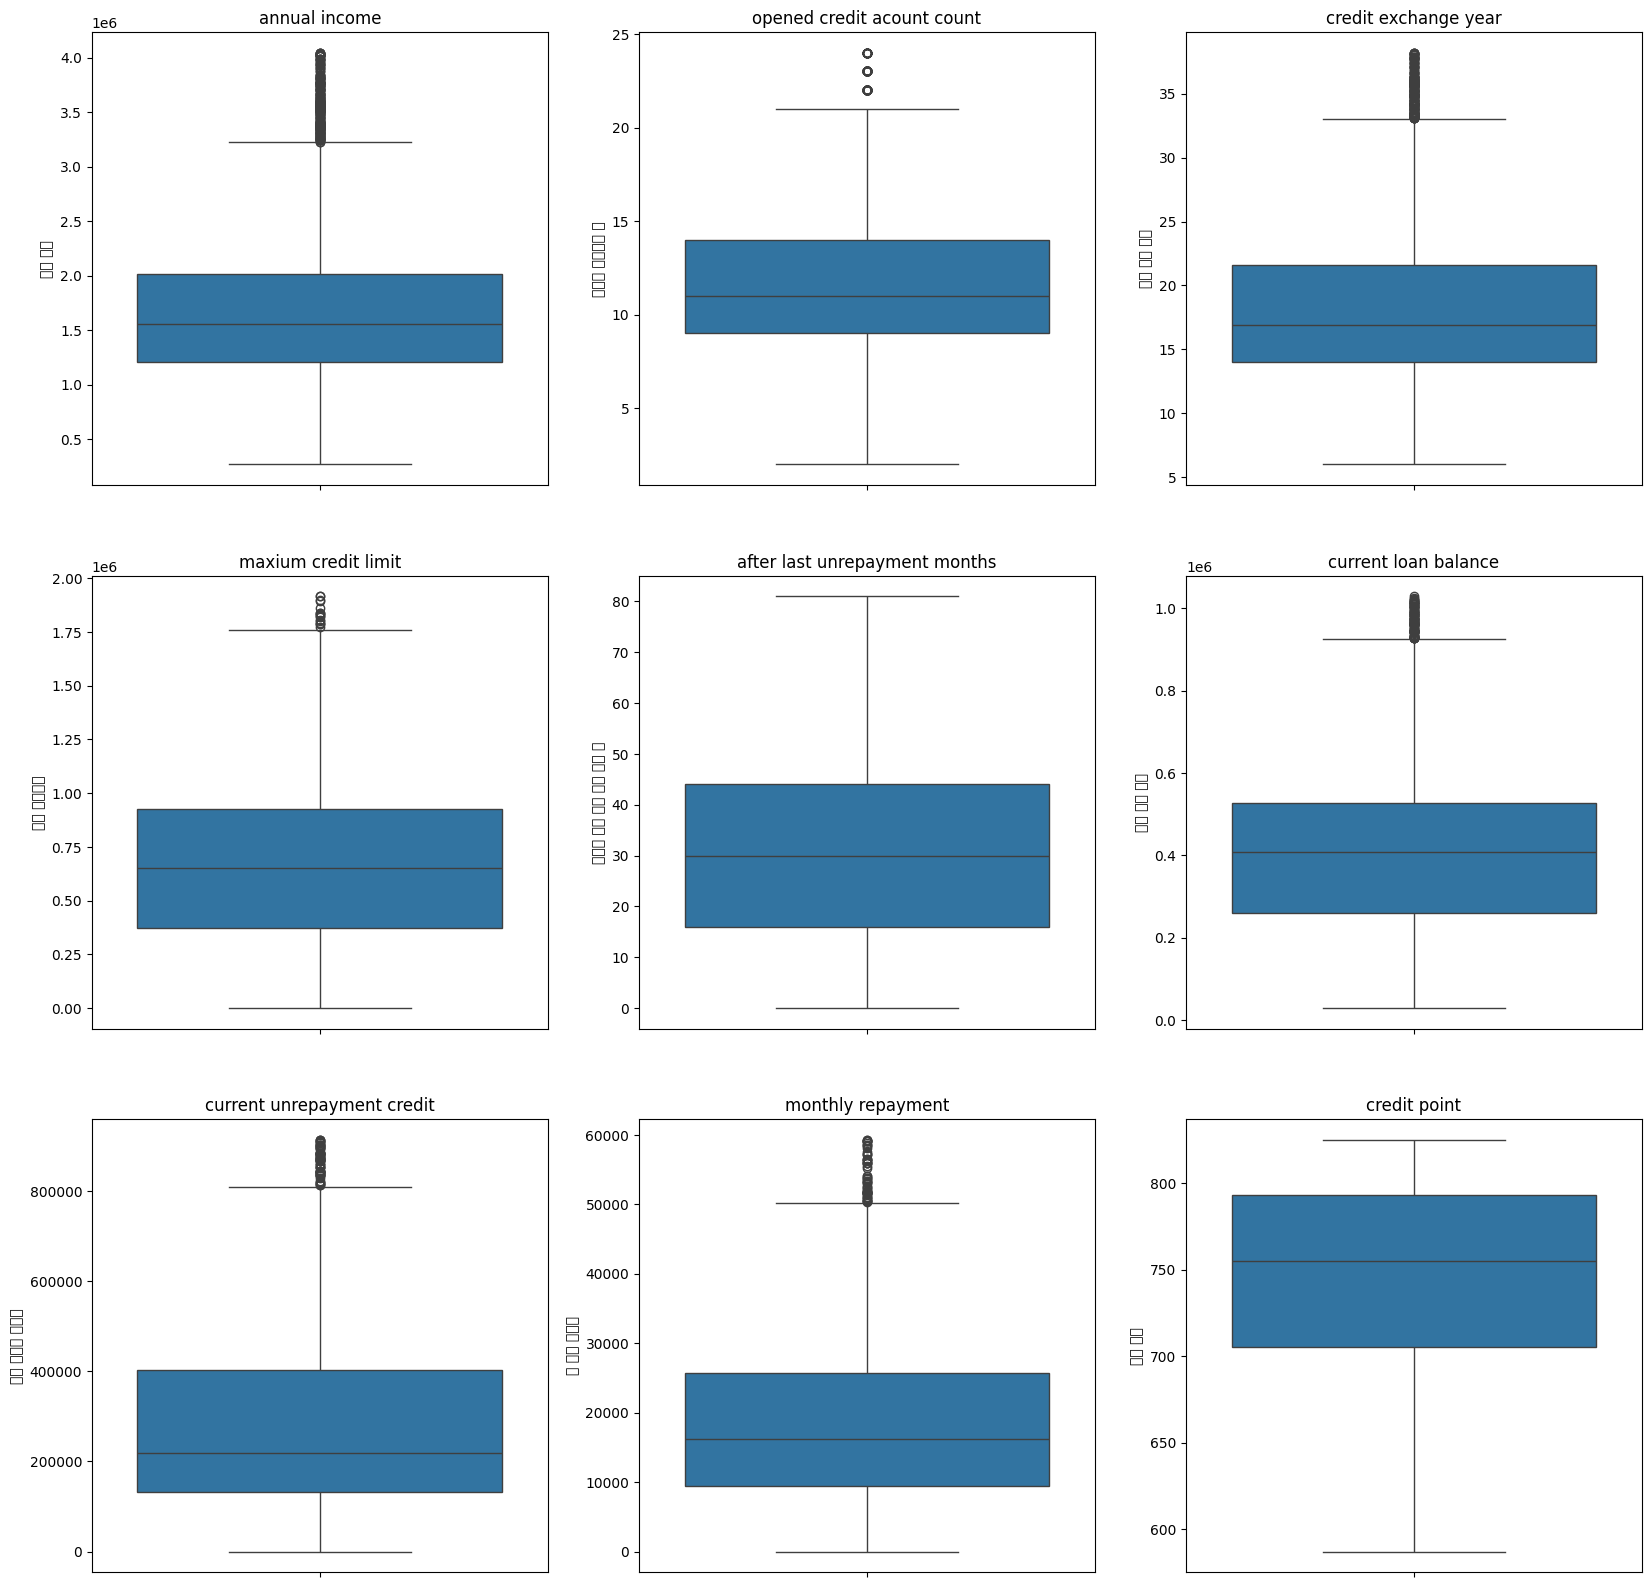

In [92]:
fig, axes = plt.subplots(3, 3, figsize = (20, 20))
sns.boxplot(train_num_del_z['연간 소득'], ax = axes[0, 0])
axes[0, 0].set_title('annual income')
sns.boxplot(train_num_del_z['개설된 신용계좌 수'], ax = axes[0, 1])
axes[0, 1].set_title('opened credit acount count')
sns.boxplot(train_num_del_z['신용 거래 연수'], ax = axes[0, 2])
axes[0, 2].set_title('credit exchange year')
sns.boxplot(train_num_del_z['최대 신용한도'], ax = axes[1, 0])
axes[1, 0].set_title('maxium credit limit')
sns.boxplot(train_num_del_z['마지막 연체 이후 경과 개월 수'], ax = axes[1, 1])
axes[1, 1].set_title('after last unrepayment months')
sns.boxplot(train_num_del_z['현재 대출 잔액'], ax = axes[1, 2])
axes[1, 2].set_title('current loan balance')
sns.boxplot(train_num_del_z['현재 미상환 신용액'], ax = axes[2, 0])
axes[2, 0].set_title('current unrepayment credit')
sns.boxplot(train_num_del_z['월 상환 부채액'], ax = axes[2, 1])
axes[2, 1].set_title('monthly repayment')
sns.boxplot(train_num_del_z['신용 점수'], ax = axes[2, 2])
axes[2, 2].set_title('credit point')

z-score를 이용해 이상치를 제거했어도 아직 남아있다.\
이건 두번, 세번을 거쳐서 제거를 해야하는 영역으로 생각된다.

In [93]:
train_num_del_zc = train_num_del_z.copy()

In [94]:
train_num_del_z_again = DelOutlierZscore(train_num_del_zc)
train_num_del_z_again

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000
6,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000
7,1410700.50000,8.00000,24.40000,692352.00000,19.00000,479349.00000,154974.00000,16842.00000,807.00000
...,...,...,...,...,...,...,...,...,...
9992,1327737.00000,10.00000,14.20000,100882.50000,32.00000,480877.50000,141427.50000,8163.00000,649.00000
9993,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000
9995,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000
9997,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000


c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\jayiu\appdata\local\programs\python\python311\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

Text(0.5, 1.0, 'credit point')

C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\

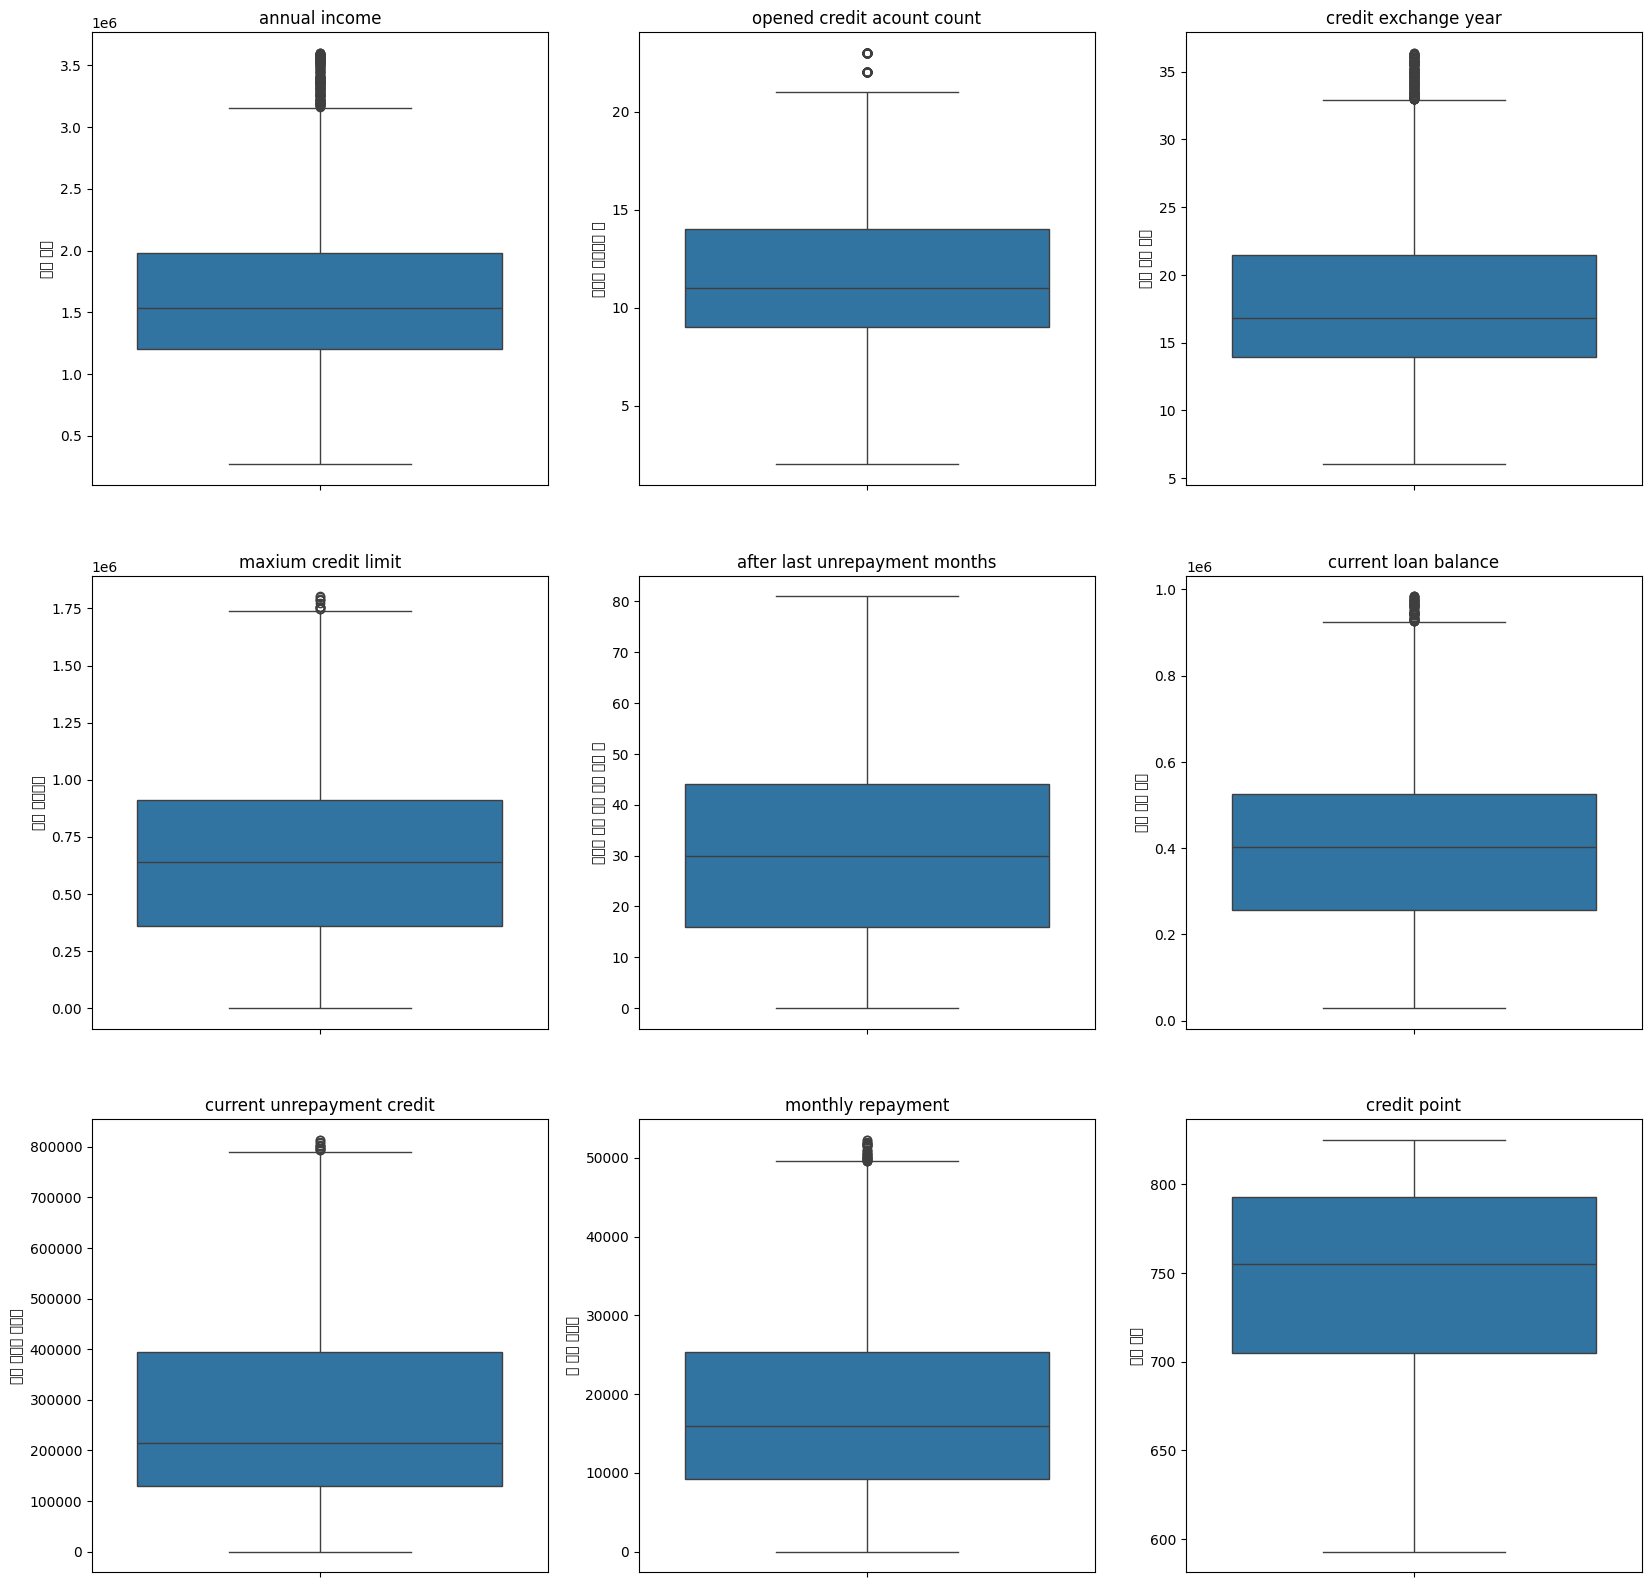

In [95]:
fig, axes = plt.subplots(3, 3, figsize = (20, 20))
sns.boxplot(train_num_del_z_again['연간 소득'], ax = axes[0, 0])
axes[0, 0].set_title('annual income')
sns.boxplot(train_num_del_z_again['개설된 신용계좌 수'], ax = axes[0, 1])
axes[0, 1].set_title('opened credit acount count')
sns.boxplot(train_num_del_z_again['신용 거래 연수'], ax = axes[0, 2])
axes[0, 2].set_title('credit exchange year')
sns.boxplot(train_num_del_z_again['최대 신용한도'], ax = axes[1, 0])
axes[1, 0].set_title('maxium credit limit')
sns.boxplot(train_num_del_z_again['마지막 연체 이후 경과 개월 수'], ax = axes[1, 1])
axes[1, 1].set_title('after last unrepayment months')
sns.boxplot(train_num_del_z_again['현재 대출 잔액'], ax = axes[1, 2])
axes[1, 2].set_title('current loan balance')
sns.boxplot(train_num_del_z_again['현재 미상환 신용액'], ax = axes[2, 0])
axes[2, 0].set_title('current unrepayment credit')
sns.boxplot(train_num_del_z_again['월 상환 부채액'], ax = axes[2, 1])
axes[2, 1].set_title('monthly repayment')
sns.boxplot(train_num_del_z_again['신용 점수'], ax = axes[2, 2])
axes[2, 2].set_title('credit point')

이상치가 제거되지 않은 것들만 따로 빼서 제거하기로함.

In [96]:
train_num_del_z_again.columns

Index(['연간 소득', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도', '마지막 연체 이후 경과 개월 수',
       '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수'],
      dtype='object')

In [97]:
train_num_del_del = train_num_del_z_again[['연간 소득', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액']]